# Developping a Borrower Scoring Algorithm

Last updated : September 25th, 2022

## Introduction

During this project, I will use a dataset provided by a consumer finance companies to develop a machine learning algorithm that will predict if the borrower will have payment difficulties or not.

## 1. Data Loading and Filtering

First we will load the necessary packages and dataset and then we will carry on with the Cleaning and Analysis.

### 1.1 Loading our packages

We will import the necessary packages to run this project: matplotlib, numpy, pandas, seaborn.
Since I am running the project on Windows, I will also use sklearnex to increase the speed of sklearn.

In [1]:
#Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#Setting large figure size for Seaborn
sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":18})

#Importing Intel extension for sklearn to improve speed
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### 1.2 Loading the dataset

We will now load the dataset

In [229]:
app_test = pd.read_csv("Data/application_test.csv", sep=",")
app = pd.read_csv("Data/application_train.csv", sep=",")

app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

## 2. Data Preparation

We will now clean our dataset.

### 2.1 Cleaning categorical variables

We will begin the cleaning process by cleaning categorical variables.

In [230]:
# Increasing maximum number of info rows 
pd.options.display.max_info_columns = 130


#Looking at unique valeus of categorical variables
def investigate_categories(df: pd.DataFrame):
    for c in df.columns:
        if df[c].dtype == 'object':
            print("Column",c)
            print("Unique values: {}".format(df[c].unique()))
            print("")
            print("-----------------------------------")
            
investigate_categories(app)

Column NAME_CONTRACT_TYPE
Unique values: ['Cash loans' 'Revolving loans']

-----------------------------------
Column CODE_GENDER
Unique values: ['M' 'F' 'XNA']

-----------------------------------
Column FLAG_OWN_CAR
Unique values: ['N' 'Y']

-----------------------------------
Column FLAG_OWN_REALTY
Unique values: ['Y' 'N']

-----------------------------------
Column NAME_TYPE_SUITE
Unique values: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

-----------------------------------
Column NAME_INCOME_TYPE
Unique values: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

-----------------------------------
Column NAME_EDUCATION_TYPE
Unique values: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

-----------------------------------
Column NAME_FAMILY_STATUS
Unique values: ['Single / not married' 'Married' 'C

In [231]:
#Investigating "XNA" values in GENDER
app[app["CODE_GENDER"] == 'XNA']
#Only 4 rows

#Let's look at the test data
app_test[app_test["CODE_GENDER"] == 'XNA']
#0 row

#We will replace with the mode
app["CODE_GENDER"] = app["CODE_GENDER"].fillna(app["CODE_GENDER"].mode())

In [232]:
#Investigating "XNA" values in ORGANIZATION_TYPE
app[app["ORGANIZATION_TYPE"] == 'XNA']
#55374 rows

app[app["ORGANIZATION_TYPE"] == 'XNA']["TARGET"].value_counts(normalize=True)
#Significant deviation from the normal percentages, so it is interesting to keep these values

#They will be encoded during the feature engineering part of the project

0    0.946004
1    0.053996
Name: TARGET, dtype: float64

In [233]:
#Looking at "nan" values in EMERGENCYSTATE_MODE
print(len(app[app["EMERGENCYSTATE_MODE"].isna()]))

app[app["EMERGENCYSTATE_MODE"].isna()]["TARGET"].value_counts(normalize=True)
#Here it represents about half our dataset, we will create a "NA" variable as well since there is a small deviation from what
#We would have expected

app.loc[app["EMERGENCYSTATE_MODE"].isna(),"EMERGENCYSTATE_MODE"] = 'UKN'

145755


In [234]:
#Looking at "nan" values in OCCUPATION TYPE
print(len(app[app["OCCUPATION_TYPE"].isna()]))

app[app["OCCUPATION_TYPE"].isna()]["TARGET"].value_counts(normalize=True)
#Here it represents about a third of our dataset, we will create a "NA" variable as well since there is a deviation from what
#we would have expected

app.loc[app["OCCUPATION_TYPE"].isna(),"OCCUPATION_TYPE"] = 'UKN'

96391


In [236]:
#Looking at "nan" values in NAME_TYPE_SUITE
print(len(app[app["NAME_TYPE_SUITE"].isna()]))
#Only 1292 NA values

#We will replace these rows by the mode
app["NAME_TYPE_SUITE"] = app["NAME_TYPE_SUITE"].fillna(app["NAME_TYPE_SUITE"].mode())

1292


In [237]:
#We can see that WEEKDAY_APPR_PROCESS_START is coded as a string

import time
#Let's convert it into week day number
app["WEEKDAY_APPR_PROCESS_START"] = app["WEEKDAY_APPR_PROCESS_START"].apply(lambda x: time.strptime(x, '%A').tm_wday)

In [2]:
import time

#Summarizing preprocessing of categorical variables
def preprocess_cat_vars(df: pd.DataFrame):

    df["CODE_GENDER"] = df["CODE_GENDER"].fillna(df["CODE_GENDER"].mode())

    df.loc[df["EMERGENCYSTATE_MODE"].isna(),"EMERGENCYSTATE_MODE"] = 'UKN'

    df.loc[df["OCCUPATION_TYPE"].isna(),"OCCUPATION_TYPE"] = 'UKN'

    df["NAME_TYPE_SUITE"] = df["NAME_TYPE_SUITE"].fillna(df["NAME_TYPE_SUITE"].mode())

    #Let's convert it into week day number
    df["WEEKDAY_APPR_PROCESS_START"] = df["WEEKDAY_APPR_PROCESS_START"].apply(lambda x: time.strptime(x, '%A').tm_wday)
    
    #Replacing 0 values in categorical fields by nan
    for c in ["FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE"]:
        df.loc[df[c] == 0, c] = np.nan
    
    return df
        

We have finished cleaning up categorical variables, now we will look at numeric variables 

### 2.2 Cleaning numeric variables 

In [240]:
#Looking for outliers 

#Increasing the number of maximum columns shown
pd.options.display.max_columns = 100
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,2.527519,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.08805

In [241]:
#DAYS_BIRTH, DAYS_REGISTRATION and DAYS_ID_PUBLISH only have negative values
app["DAYS_REGISTRATION"] = abs(app["DAYS_REGISTRATION"])
app["DAYS_ID_PUBLISH"] = abs(app["DAYS_ID_PUBLISH"])
app["DAYS_BIRTH"] = abs(app["DAYS_BIRTH"])

#DAYS EMPLOYED have abherrent values (365243 days, about 1000 years)
app.loc[app["DAYS_EMPLOYED"] > 100000, "DAYS_EMPLOYED"] = np.nan
app["DAYS_EMPLOYED"] = abs(app["DAYS_EMPLOYED"])

print(app["DAYS_BIRTH"].min()/365, app["DAYS_BIRTH"].max()/365)
#No outlier data, from 20 to 69 years

def label_age(days_birth):
    age_years = days_birth / 365
    if age_years < 30: return 1
    elif age_years < 40: return 2
    elif age_years < 50: return 3
    elif age_years < 60: return 4
    elif age_years < 70: return 5
    else: return 0
    
app["AGE_LABEL"] = app["DAYS_BIRTH"].apply(lambda x: label_age(x))

app = app[app['AMT_INCOME_TOTAL'] < 20000000] # remove an outlier (117 million)

# Calculated features
app['DAYS_EMPLOYED_PCT'] = app['DAYS_EMPLOYED'] / app['DAYS_BIRTH']
app['INCOME_CREDIT_PCT'] = app['AMT_INCOME_TOTAL'] / app['AMT_CREDIT']
app['INCOME_PER_PERSON'] = app['AMT_INCOME_TOTAL'] / app['CNT_FAM_MEMBERS']
app['ANNUITY_INCOME_PCT'] = app['AMT_ANNUITY'] / app['AMT_INCOME_TOTAL']
app['PAYMENT_RATE'] = app['AMT_ANNUITY'] / app['AMT_CREDIT']

20.517808219178082 69.12054794520547


In [242]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,...,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_LABEL,DAYS_EMPLOYED_PCT,INCOME_CREDIT_PCT,INCOME_PER_PERSON,ANNUITY_INCOME_PCT,PAYMENT_RATE
count,307510.000000,307510.000000,307510.000000,3.075100e+05,3.075100e+05,307498.000000,3.072320e+05,307510.000000,307510.000000,252136.000000,307510.000000,307510.000000,104582.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307508.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,134132.000000,3.068500e+05,246545.000000,151449.000000,127567.000000,157503.000000,103023.000000,92646.000000,143619.000000,152682.000000,154490.000000,98869.000000,124920.000000,97312.000000,153160.000000,93997.000000,137829.000000,151449.000000,127567.000000,157503.000000,...,157503.000000,103023.000000,92646.000000,143619.000000,152682.000000,154490.000000,98869.000000,124920.000000,97312.000000,153160.000000,93997.000000,137829.000000,159079.000000,306489.000000,306489.000000,306489.000000,306489.000000,307509.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.00000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,265991.000000,265991.000000,265991.000000,265991.000000,265991.000000,265991.000000,307510.000000,252136.000000,307510.000000,3.075080e+05,307498.000000,307498.000000
mean,278181.049335,0.080726,0.417050,1.684180e+05,5.990261e+05,27108.576882,5.383965e+05,0.020868,16037.006195,2384.175124,4986.114553,2994.200263,12.061091,0.999997,0.819889,0.199369,0.998133,0.281067,0.056720,2.152663,2.052463,2.031521,2.527524,12.063413,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143940e-01,0.510854,0.117441,0.088442,0.977735,0.752471,0.044621,0.078942,0.149724,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,...,0.977752,0.755746,0.044595,0.078078,0.149212,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422250,0.143421,1.405297,0.100049,-962.861919,0.000042,0.710022,0.000081,0.015115,0.088056,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0

In [243]:
#Turning SK_ID_CURR into an ID field :
app.set_index('SK_ID_CURR', inplace=True)

app.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_LABEL,DAYS_EMPLOYED_PCT,INCOME_CREDIT_PCT,INCOME_PER_PERSON,ANNUITY_INCOME_PCT,PAYMENT_RATE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637.0,3648.0,2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,2,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,...,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.067329,0.498036,202500.0,0.121978,0.060749
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188.0,1186.0,291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,0,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,...,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.070862,0.208736,135000.0,0.132217,0.027598
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225.0,4260.0,2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,0,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UKN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.011814,0.500000,67500.0,0.100000,0.050000
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039.0,9833.0,2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,2,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UKN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,4,0.159905,0.431748,67500.0,0.219

Analysis of the describe() output shows that there is **no clear outlier** in the rest of the numeric data. We can now start handling missing values.

In [244]:
len(app.columns[app.isnull().any()])
#21 columns with NA values

#Dropping rows with more than 50% na values
def drop_na_rows(df: pd.DataFrame, pct: float):
    n = len(df.columns)
    cutoff = n*pct/100 
    df = df[df.isna().sum(axis=1) > cutoff]


In [3]:
#Summarizing cleaning of numeric variables:

def preprocess_num_vars(df: pd.DataFrame,
                        quantiles=[25650.0,81000.0,99000.0,112500.0,135000.0,147150.0,162000.0,180000.0,225000.0,270000.0,117000000.0]):
    #Setting index
    data = df.copy()
    data.set_index('SK_ID_CURR', inplace=True)
    
    #DAYS_BIRTH, DAYS_REGISTRATION and DAYS_ID_PUBLISH only have negative values
    data["DAYS_REGISTRATION"] = abs(data["DAYS_REGISTRATION"])
    data["DAYS_ID_PUBLISH"] = abs(data["DAYS_ID_PUBLISH"])
    data["DAYS_BIRTH"] = abs(data["DAYS_BIRTH"])

    #DAYS EMPLOYED have abherrent values (365243 days, about 1000 years)
    data["DAYS_EMPLOYED_ANOM_FLAG"] = 0 #Creating anomaly flag
    data.loc[data["DAYS_EMPLOYED"] > 100000, "DAYS_EMPLOYED_ANOM_FLAG"] = 1 
    data.loc[data["DAYS_EMPLOYED"] > 100000, "DAYS_EMPLOYED"] = np.nan
    data["DAYS_EMPLOYED"] = abs(data["DAYS_EMPLOYED"])

    def label_age(days_birth):
        age_years = days_birth / 365
        if age_years < 30: return 1
        elif age_years < 40: return 2
        elif age_years < 50: return 3
        elif age_years < 60: return 4
        elif age_years < 70: return 5
        else: return 0

    data["AGE_LABEL"] = data["DAYS_BIRTH"].apply(lambda x: label_age(x))

    data = data[data['AMT_INCOME_TOTAL'] < 20000000] # remove an outlier (117 million)

    
    data["AMT_INCOME_BIN"] = pd.cut(data["AMT_INCOME_TOTAL"], bins=quantiles, labels=False)

    # Calculated features
    data['DAYS_EMPLOYED_PCT'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
    data['INCOME_CREDIT_PCT'] = data['AMT_INCOME_TOTAL'] / data['AMT_CREDIT']
    data['INCOME_PER_PERSON'] = data['AMT_INCOME_TOTAL'] / data['CNT_FAM_MEMBERS']
    data['ANNUITY_INCOME_PCT'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
    data['PAYMENT_RATE'] = data['AMT_ANNUITY'] / data['AMT_CREDIT']
    
    return data


We have verified that all of our 3 sets are composed only of numeric features and that they have the same number of columns.

We will now use **additional features from other dataframes** to increase the performance of our models.

### 2.3 Using previous application data

In [246]:
prev_app = pd.read_csv("Data/previous_application.csv", sep=",")

prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [247]:
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [248]:
#We are interested in DAYS_LAST_DUE (the number of days the borrower has to pay previous applications)
#But there are illogical values (365243 which is equal to 1000 years)
#First we'll replace all the values by nan
prev_app.loc[prev_app.DAYS_LAST_DUE > 300000, "DAYS_LAST_DUE"] = np.nan
prev_app.loc[prev_app.DAYS_FIRST_DUE > 300000, "DAYS_FIRST_DUE"] = np.nan
prev_app.loc[prev_app.DAYS_LAST_DUE_1ST_VERSION > 300000, "DAYS_LAST_DUE_1ST_VERSION"] = np.nan
prev_app.loc[prev_app.DAYS_FIRST_DRAWING > 300000, "DAYS_FIRST_DRAWING"] = np.nan
prev_app.loc[prev_app.DAYS_TERMINATION > 300000, "DAYS_TERMINATION"] = np.nan

#Defining current amount due, we have to add a negative sign because DAYS_LAST_DUE is negative
prev_app["AMT_CURR_DUE"] = -prev_app["AMT_ANNUITY"]*prev_app["DAYS_LAST_DUE"]/365

prev_app["CURR_ANNUITY"] = 0
prev_app.loc[prev_app["DAYS_LAST_DUE"] < 0, "CURR_ANNUITY"] = prev_app["AMT_ANNUITY"]

# Calculated variables
prev_app['APPLICATION_CREDIT_DIF'] = prev_app['AMT_APPLICATION'] - prev_app['AMT_CREDIT']
prev_app['CREDIT_TO_ANNUITY'] = prev_app['AMT_CREDIT'] / prev_app['AMT_ANNUITY']
prev_app['DOWN_PAYMENT_TO_CREDIT'] = prev_app['AMT_DOWN_PAYMENT'] / prev_app['AMT_CREDIT']

prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_CURR_DUE,CURR_ANNUITY,APPLICATION_CREDIT_DIF,CREDIT_TO_ANNUITY,DOWN_PAYMENT_TO_CREDIT
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,NaN,-42.0,300.0,-42.0,-37.0,0.0,199.117973,1730.430,0.0,9.907942,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,NaN,-134.0,916.0,NaN,NaN,1.0,NaN,0.000,-72171.0,26.983262,NaN
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,NaN,-271.0,59.0,NaN,NaN,1.0,NaN,0.000,-23944.5,9.059618,NaN
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,NaN,-482.0,-152.0,-182.0,-177.0,1.0,23456.227315,47041.335,-20790.0,10.008007,NaN
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,-66555.0,12.656622,NaN


In [249]:
#Verifying unique values of contract status
prev_app.NAME_CONTRACT_STATUS.unique()
#4 categories, Approved, Refused, Canceled and Unused offer

prev_app["AMT_GRANTED"] = 0
prev_app.loc[prev_app["NAME_CONTRACT_STATUS"] == "Approved", "AMT_GRANTED"] = prev_app["AMT_CREDIT"]

prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_CURR_DUE,CURR_ANNUITY,APPLICATION_CREDIT_DIF,CREDIT_TO_ANNUITY,DOWN_PAYMENT_TO_CREDIT,AMT_GRANTED
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,NaN,-42.0,300.0,-42.0,-37.0,0.0,199.117973,1730.430,0.0,9.907942,0.0,17145.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,NaN,-134.0,916.0,NaN,NaN,1.0,NaN,0.000,-72171.0,26.983262,NaN,679671.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,NaN,-271.0,59.0,NaN,NaN,1.0,NaN,0.000,-23944.5,9.059618,NaN,136444.5
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,NaN,-482.0,-152.0,-182.0,-177.0,1.0,23456.227315,47041.335,-20790.0,10.008007,NaN,470790.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,-66555.0,12.656622,NaN,0.0


In [250]:
aggregations = {
        'AMT_ANNUITY': ['std', 'mean', 'sum'],
        'AMT_APPLICATION': ['std', 'mean', 'sum'],
        'AMT_CREDIT': ['std', 'mean', 'sum'],
        'AMT_CURR_DUE': ['std', 'mean', 'sum'],
        'CURR_ANNUITY': ['std', 'mean', 'sum'],
        'AMT_DOWN_PAYMENT': ['std', 'mean', 'sum'],
        'AMT_GOODS_PRICE': ['std', 'mean', 'sum'],
        'HOUR_APPR_PROCESS_START': ['std', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['std', 'mean', 'sum'],
        'CNT_PAYMENT': ['mean', 'sum','std'],
        'SK_ID_PREV': ['nunique'],
        'DAYS_TERMINATION': ['mean', 'sum', 'std'],
        'DOWN_PAYMENT_TO_CREDIT': ['sum', 'mean', 'std']
    }

#We will aggregate by SK_ID_CURR and retrieve important information about previous applications :
prev_app_numbers = prev_app.groupby("SK_ID_CURR").agg(aggregations)

#Renaming columns to remove multi indexing
prev_app_numbers.columns = pd.Index(['APP' + '_' + e[0] + '_' + e[1] for e in prev_app_numbers.columns])

prev_app_numbers.head()

,APP_AMT_ANNUITY_std,APP_AMT_ANNUITY_mean,APP_AMT_ANNUITY_sum,APP_AMT_APPLICATION_std,APP_AMT_APPLICATION_mean,APP_AMT_APPLICATION_sum,APP_AMT_CREDIT_std,APP_AMT_CREDIT_mean,APP_AMT_CREDIT_sum,APP_AMT_CURR_DUE_std,APP_AMT_CURR_DUE_mean,APP_AMT_CURR_DUE_sum,APP_CURR_ANNUITY_std,APP_CURR_ANNUITY_mean,APP_CURR_ANNUITY_sum,APP_AMT_DOWN_PAYMENT_std,APP_AMT_DOWN_PAYMENT_mean,APP_AMT_DOWN_PAYMENT_sum,APP_AMT_GOODS_PRICE_std,APP_AMT_GOODS_PRICE_mean,APP_AMT_GOODS_PRICE_sum,APP_HOUR_APPR_PROCESS_START_std,APP_HOUR_APPR_PROCESS_START_mean,APP_RATE_DOWN_PAYMENT_min,APP_RATE_DOWN_PAYMENT_max,APP_RATE_DOWN_PAYMENT_mean,APP_DAYS_DECISION_std,APP_DAYS_DECISION_mean,APP_DAYS_DECISION_sum,APP_CNT_PAYMENT_mean,APP_CNT_PAYMENT_sum,APP_CNT_PAYMENT_std,APP_SK_ID_PREV_nunique,APP_DAYS_TERMINATION_mean,APP_DAYS_TERMINATION_sum,APP_DAYS_TERMINATION_std,APP_DOWN_PAYMENT_TO_CREDIT_sum,APP_DOWN_PAYMENT_TO_CREDIT_mean,APP_DOWN_PAYMENT_TO_CREDIT_std
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,NaN,3951.000,3951.000,NaN,24835.50,24835.5,NaN,23787.00,23787.0,NaN,17525.120548,17525.120548,NaN,3951.000,3951.000,NaN,2520.0,2520.0,NaN,24835.5,24835.5,NaN,13.000000,0.104326,0.104326,0.104326,NaN,-1740.0,-1740,8.0,8.0,NaN,1,-1612.000000,-1612.0,NaN,0.105940,0.105940,NaN
100002,NaN,9251.775,9251.775,NaN,179055.00,179055.0,NaN,179055.00,179055.0,NaN,633.683219,633.683219,NaN,9251.775,9251.775,NaN,0.0,0.0,NaN,179055.0,179055.0,NaN,9.000000,0.000000,0.000000,0.000000,NaN,-606.0,-606,24.0,24.0,NaN,1,-17.000000,-17.0,NaN,0.000000,0.000000,NaN
100003,46332.557777,56553.990,169661.970,424161.620549,435436.50,1306309.5,497949.861808,484191.00,1452573.0,55690.034366,98478.997603,295436.992808,46332.557777,56553.990,169661.970,4868.430188,3442.5,6885.0,424161.620549,435436.5,1306309.5,2.516611,14.666667,0.000000,0.100061,0.050030,898.138631,-1305.0,-3915,10.0,30.0,3.464102,3,-1047.333333,-3142.0,806.196213,0.101170,0.050585,0.071538
100004,NaN,5357.250,5357.250,NaN,24282.00,24282.0,NaN,20106.00,20106.0,NaN,10626.435616,10626.435616,NaN,5357.250,5357.250,NaN,4860.0,4860.0,NaN,24282.0,24282.0,NaN,5.000000,0.212008,0.212008,0.212008,NaN,-815.0,-815,4.0,4.0,NaN,1,-714.000000,-714.0,NaN,0.241719,0.241719,NaN
100005,NaN,4813.200,4813.200,31549.336810,22308.75,44617.5,28392.812138,20076.75,40153.5,NaN,6145.071781,6145.071781,3403.446359,2406.600,4813.200,NaN,4464.0,4464.0,NaN,44617.5,44617.5,0.707107,10.500000,0.108964,0.108964,0.108964,312.541197,-536.0,-1072,12.0,12.0,NaN,2,-460.000000,-460.0,NaN,0.111173,0.111173,NaN


In [251]:
#Creating a dataframe with the number of each different name contract status by SK_ID_CURR
prev_app_status = pd.crosstab(prev_app['SK_ID_CURR'], prev_app['NAME_CONTRACT_STATUS'])

cols = ["N_PREV_APPROVED","N_PREV_CANCELED","N_PREV_REFUSED","N_PREV_UNUSED"]
prev_app_status.columns = cols

#Importing the number of unique applications from prev_app_numbers
prev_app_status = pd.merge(prev_app_status, prev_app_numbers[["APP_SK_ID_PREV_nunique"]],
                           how="inner", left_index=True, right_index=True)

for c in cols:
    prev_app_status[c] = prev_app_status[c] / prev_app_status["APP_SK_ID_PREV_nunique"]

prev_app_status = prev_app_status.drop(columns={"APP_SK_ID_PREV_nunique"})
prev_app_status.head()

,N_PREV_APPROVED,N_PREV_CANCELED,N_PREV_REFUSED,N_PREV_UNUSED
SK_ID_CURR,,,,
100001,1.0,0.0,0.0,0.0
100002,1.0,0.0,0.0,0.0
100003,1.0,0.0,0.0,0.0
100004,1.0,0.0,0.0,0.0
100005,0.5,0.5,0.0,0.0


In [252]:
prev_app_df = pd.merge(prev_app_numbers, prev_app_status, how='inner', left_index=True, right_index=True)

prev_app_df.head()

,APP_AMT_ANNUITY_std,APP_AMT_ANNUITY_mean,APP_AMT_ANNUITY_sum,APP_AMT_APPLICATION_std,APP_AMT_APPLICATION_mean,APP_AMT_APPLICATION_sum,APP_AMT_CREDIT_std,APP_AMT_CREDIT_mean,APP_AMT_CREDIT_sum,APP_AMT_CURR_DUE_std,APP_AMT_CURR_DUE_mean,APP_AMT_CURR_DUE_sum,APP_CURR_ANNUITY_std,APP_CURR_ANNUITY_mean,APP_CURR_ANNUITY_sum,APP_AMT_DOWN_PAYMENT_std,APP_AMT_DOWN_PAYMENT_mean,APP_AMT_DOWN_PAYMENT_sum,APP_AMT_GOODS_PRICE_std,APP_AMT_GOODS_PRICE_mean,APP_AMT_GOODS_PRICE_sum,APP_HOUR_APPR_PROCESS_START_std,APP_HOUR_APPR_PROCESS_START_mean,APP_RATE_DOWN_PAYMENT_min,APP_RATE_DOWN_PAYMENT_max,APP_RATE_DOWN_PAYMENT_mean,APP_DAYS_DECISION_std,APP_DAYS_DECISION_mean,APP_DAYS_DECISION_sum,APP_CNT_PAYMENT_mean,APP_CNT_PAYMENT_sum,APP_CNT_PAYMENT_std,APP_SK_ID_PREV_nunique,APP_DAYS_TERMINATION_mean,APP_DAYS_TERMINATION_sum,APP_DAYS_TERMINATION_std,APP_DOWN_PAYMENT_TO_CREDIT_sum,APP_DOWN_PAYMENT_TO_CREDIT_mean,APP_DOWN_PAYMENT_TO_CREDIT_std,N_PREV_APPROVED,N_PREV_CANCELED,N_PREV_REFUSED,N_PREV_UNUSED
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,NaN,3951.000,3951.000,NaN,24835.50,24835.5,NaN,23787.00,23787.0,NaN,17525.120548,17525.120548,NaN,3951.000,3951.000,NaN,2520.0,2520.0,NaN,24835.5,24835.5,NaN,13.000000,0.104326,0.104326,0.104326,NaN,-1740.0,-1740,8.0,8.0,NaN,1,-1612.000000,-1612.0,NaN,0.105940,0.105940,NaN,1.0,0.0,0.0,0.0
100002,NaN,9251.775,9251.775,NaN,179055.00,179055.0,NaN,179055.00,179055.0,NaN,633.683219,633.683219,NaN,9251.775,9251.775,NaN,0.0,0.0,NaN,179055.0,179055.0,NaN,9.000000,0.000000,0.000000,0.000000,NaN,-606.0,-606,24.0,24.0,NaN,1,-17.000000,-17.0,NaN,0.000000,0.000000,NaN,1.0,0.0,0.0,0.0
100003,46332.557777,56553.990,169661.970,424161.620549,435436.50,1306309.5,497949.861808,484191.00,1452573.0,55690.034366,98478.997603,295436.992808,46332.557777,56553.990,169661.970,4868.430188,3442.5,6885.0,424161.620549,435436.5,1306309.5,2.516611,14.666667,0.000000,0.100061,0.050030,898.138631,-1305.0,-3915,10.0,30.0,3.464102,3,-1047.333333,-3142.0,806.196213,0.101170,0.050585,0.071538,1.0,0.0,0.0,0.0
100004,NaN,5357.250,5357.250,NaN,24282.00,24282.0,NaN,20106.00,20106.0,NaN,10626.435616,10626.435616,NaN,5357.250,5357.250,NaN,4860.0,4860.0,NaN,24282.0,24282.0,NaN,5.000000,0.212008,0.212008,0.212008,NaN,-815.0,-815,4.0,4.0,NaN,1,-714.000000,-714.0,NaN,0.241719,0.241719,NaN,1.0,0.0,0.0,0.0
100005,NaN,4813.200,4813.200,31549.336810,22308.75,44617.5,28392.812138,20076.75,40153.5,NaN,6145.071781,6145.071781,3403.446359,2406.600,4813.200,NaN,4464.0,4464.0,NaN,44617.5,44617.5,0.707107,10.500000,0.108964,0.108964,0.108964,312.541197,-536.0,-1072,12.0,12.0,NaN,2,-460.000000,-460.0,NaN,0.111173,0.111173,NaN,0.5,0.5,0.0,0.0


In [25]:
# #Saving prev_app_df to prevent RAM usage and reduce rerun time
# prev_app_df.to_csv("Data/prev_app_df.csv")

In [4]:
def load_prev_app_info(X_train, test_set=False, X_test=None, X_val=None, validation_set=False):

    #Joining this new data and filling NAs with 0 (since it means there was no previous application)
    X_train = pd.merge(X_train, prev_app_df, how='left', left_index=True, right_index=True)
    if not test_set:
        return X_train
    else:
        X_test = pd.merge(X_test, prev_app_df, how='left', left_index=True, right_index=True)
    if validation_set:
        X_val = pd.merge(X_val, prev_app_df, how='left', left_index=True, right_index=True)
        return X_train, X_test, X_val
    return X_train, X_test


### 2.4 Using Credit Bureau information

We also have information about CB for each borrower that we can use to increase the accuracy of our model:

In [253]:
bureau = pd.read_csv("Data/bureau.csv", sep=",")

bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [254]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [255]:
print(bureau.CREDIT_ACTIVE.unique())
print(bureau.CREDIT_CURRENCY.unique())

len(bureau[bureau.CREDIT_CURRENCY.isna()])
#Credit active is interesting because of the bad debt field
#Currency is also interesting because it could be an indicator to fraudulent transactions

['Closed' 'Active' 'Sold' 'Bad debt']
['currency 1' 'currency 2' 'currency 4' 'currency 3']


0

In [256]:
#Calculating new features

#Date differences
bureau['CREDIT_DURATION'] = -bureau['DAYS_CREDIT'] + bureau['DAYS_CREDIT_ENDDATE']
bureau['ENDDATE_DIF'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_ENDDATE_FACT']

#Day overdue flags:
bureau['BUREAU_IS_DPD'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x > 0 else 0)
bureau['BUREAU_IS_DPD_OVER100'] = bureau['CREDIT_DAY_OVERDUE'].apply(lambda x: 1 if x > 100 else 0)
                                                                     
#Debt ratio                                                         
bureau['BUREAU_CREDIT_DEBT_RATIO'] = bureau['AMT_CREDIT_SUM_DEBT'] / bureau['AMT_CREDIT_SUM']


#We will now aggreagte over SK_ID_CURR to calculate relevant numeric features 

aggregations = {
        'DAYS_CREDIT': ['sum', 'mean', 'std'],
        'DAYS_CREDIT_ENDDATE': ['sum', 'mean', 'std'],
        'CREDIT_DAY_OVERDUE': ['min', 'max', 'sum','mean', 'std'],
        'AMT_CREDIT_MAX_OVERDUE': ['min', 'max', 'sum', 'mean', 'std'],
        'AMT_CREDIT_SUM': ['min', 'max', 'sum', 'mean', 'std'],
        'AMT_CREDIT_SUM_DEBT': ['min', 'max', 'sum', 'mean', 'std'],
        'AMT_CREDIT_SUM_OVERDUE': ['min', 'max', 'sum', 'mean', 'std'],
        'AMT_CREDIT_SUM_LIMIT': ['min', 'max', 'sum', 'mean', 'std'],
        'AMT_ANNUITY': ['min', 'max', 'mean', 'sum', 'std'],
        'CNT_CREDIT_PROLONG': ['sum', 'mean', 'std'],
        'SK_ID_BUREAU': ['count'],
        'DAYS_ENDDATE_FACT': ['min', 'max', 'mean', 'std'],
        'ENDDATE_DIF': ['min', 'max', 'mean', 'std'],
        'BUREAU_CREDIT_DEBT_RATIO': ['min', 'max', 'mean','std'],
        'BUREAU_IS_DPD': ['mean', 'sum', 'std'],
        'BUREAU_IS_DPD_OVER100': ['mean', 'sum', 'std']
} 
                                                                     
bureau_num = bureau.groupby("SK_ID_CURR").agg(aggregations)

#Renaming columns to remove multi indexing
bureau_num.columns = pd.Index(['BUREAU' + '_' + e[0] + '_' + e[1] for e in bureau_num.columns])

bureau_num.head()

,BUREAU_DAYS_CREDIT_sum,BUREAU_DAYS_CREDIT_mean,BUREAU_DAYS_CREDIT_std,BUREAU_DAYS_CREDIT_ENDDATE_sum,BUREAU_DAYS_CREDIT_ENDDATE_mean,BUREAU_DAYS_CREDIT_ENDDATE_std,BUREAU_CREDIT_DAY_OVERDUE_min,BUREAU_CREDIT_DAY_OVERDUE_max,BUREAU_CREDIT_DAY_OVERDUE_sum,BUREAU_CREDIT_DAY_OVERDUE_mean,BUREAU_CREDIT_DAY_OVERDUE_std,BUREAU_AMT_CREDIT_MAX_OVERDUE_min,BUREAU_AMT_CREDIT_MAX_OVERDUE_max,BUREAU_AMT_CREDIT_MAX_OVERDUE_sum,BUREAU_AMT_CREDIT_MAX_OVERDUE_mean,BUREAU_AMT_CREDIT_MAX_OVERDUE_std,BUREAU_AMT_CREDIT_SUM_min,BUREAU_AMT_CREDIT_SUM_max,BUREAU_AMT_CREDIT_SUM_sum,BUREAU_AMT_CREDIT_SUM_mean,BUREAU_AMT_CREDIT_SUM_std,BUREAU_AMT_CREDIT_SUM_DEBT_min,BUREAU_AMT_CREDIT_SUM_DEBT_max,BUREAU_AMT_CREDIT_SUM_DEBT_sum,BUREAU_AMT_CREDIT_SUM_DEBT_mean,BUREAU_AMT_CREDIT_SUM_DEBT_std,BUREAU_AMT_CREDIT_SUM_OVERDUE_min,BUREAU_AMT_CREDIT_SUM_OVERDUE_max,BUREAU_AMT_CREDIT_SUM_OVERDUE_sum,BUREAU_AMT_CREDIT_SUM_OVERDUE_mean,BUREAU_AMT_CREDIT_SUM_OVERDUE_std,BUREAU_AMT_CREDIT_SUM_LIMIT_min,BUREAU_AMT_CREDIT_SUM_LIMIT_max,BUREAU_AMT_CREDIT_SUM_LIMIT_sum,BUREAU_AMT_CREDIT_SUM_LIMIT_mean,BUREAU_AMT_CREDIT_SUM_LIMIT_std,BUREAU_AMT_ANNUITY_min,BUREAU_AMT_ANNUITY_max,BUREAU_AMT_ANNUITY_mean,BUREAU_AMT_ANNUITY_sum,BUREAU_AMT_ANNUITY_std,BUREAU_CNT_CREDIT_PROLONG_sum,BUREAU_CNT_CREDIT_PROLONG_mean,BUREAU_CNT_CREDIT_PROLONG_std,BUREAU_SK_ID_BUREAU_count,BUREAU_DAYS_ENDDATE_FACT_min,BUREAU_DAYS_ENDDATE_FACT_max,BUREAU_DAYS_ENDDATE_FACT_mean,BUREAU_DAYS_ENDDATE_FACT_std,BUREAU_ENDDATE_DIF_min,BUREAU_ENDDATE_DIF_max,BUREAU_ENDDATE_DIF_mean,BUREAU_ENDDATE_DIF_std,BUREAU_BUREAU_CREDIT_DEBT_RATIO_min,BUREAU_BUREAU_CREDIT_DEBT_RATIO_max,BUREAU_BUREAU_CREDIT_DEBT_RATIO_mean,BUREAU_BUREAU_CREDIT_DEBT_RATIO_std,BUREAU_BUREAU_IS_DPD_mean,BUREAU_BUREAU_IS_DPD_sum,BUREAU_BUREAU_IS_DPD_std,BUREAU_BUREAU_IS_DPD_OVER100_mean,BUREAU_BUREAU_IS_DPD_OVER100_sum,BUREAU_BUREAU_IS_DPD_OVER100_std
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,-5145,-735.000000,489.942514,577.0,82.428571,1032.859277,0,0,0,0.0,0.0,NaN,NaN,0.000,NaN,NaN,85500.0,378000.0,1453365.000,207623.571429,122544.544510,0.0,373239.0,596686.5,85240.928571,137485.631124,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.00000,0.0000,0.0,10822.5,3545.357143,24817.5,4800.607529,0,0.0,0.0,7,-1328.0,-544.0,-825.500000,369.078582,-1.0,698.0,197.0,334.957709,0.0,0.987405,0.282518,0.399523,0.0,0,0.0,0.0,0,0.0
100002,-6992,-874.000000,431.451040,-2094.0,-349.000000,767.490977,0,0,0,0.0,0.0,0.0,5043.645,8405.145,1681.029,2363.2469,0.0,450000.0,865055.565,108131.945625,146075.557435,0.0,245781.0,245781.0,49156.200000,109916.604716,0.0,0.0,0.0,0.0,0.0,0.0,31988.565,31988.565,7997.14125,15994.2825,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,8,-1185.0,-36.0,-697.500000,515.992539,0.0,1029.0,252.6,437.954678,0.0,0.546180,0.136545,0.273090,0.0,0,0.0,0.0,0,0.0
100003,-5603,-1400.750000,909.826128,-2178.0,-544.500000,1492.770467,0,0,0,0.0,0.0,0.0,0.000,0.000,0.000,0.0000,22248.0,810000.0,1017400.500,254350.125000,372269.465535,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,810000.000,810000.000,202500.00000,405000.0000,NaN,NaN,NaN,0.0,NaN,0,0.0,0.0,4,-2131.0,-540.0,-1097.333333,896.097279,-303.0,201.0,-34.0,253.714406,0.0,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0,0.0
100004,-1734,-867.000000,649.124025,-977.0,-488.500000,150.613744,0,0,0,0.0,0.0,0.0,0.000,0.000,0.000,NaN,94500.0,94537.8,189037.800,94518.900000,26.728636,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.00000,0.0000,NaN,NaN,NaN,0.0,NaN,0,0.0,0.0,2,-683.0,-382.0,-532.500000,212.839141,0.0,88.0,44.0,62.225397,0.0,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,0,0.0
100005,-572,-190.666667,162.297053,1318.0,439.333333,776.274007,0,0,0,0.0,0.0,0.0,0.000,0.000,0.000,NaN,29826.0,568800.0,657126.000,219042.000000,303238.426806,0.0,543087.0,568408.5,189469.500000,306503.339003,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.00000,0.0000,0.0,4261.5,1420.500000,4261.5,2460.378172,0,0.0,0.0,3,-123.0,-123.0,-123.000000,NaN,-5.0,-5.0,-5.0,NaN,0.0,0.954794

In [257]:
#We will count the number of CB credits with each of these attributes :
bureau_categ1 = pd.crosstab(bureau['SK_ID_CURR'], bureau['CREDIT_ACTIVE'])
bureau_categ2 = pd.crosstab(bureau['SK_ID_CURR'], bureau['CREDIT_CURRENCY'])

bureau_categ = pd.merge(bureau_categ1, bureau_categ2, how="outer", left_index=True, right_index=True)

cols = ['CB_ACTIVE', 'CB_BAD_DEBT', 'CB_CLOSED', 'CB_SOLD',
                        'CB_CURR1', 'CB_CURR2', 'CB_CURR3', 'CB_CURR4']
bureau_categ.columns = cols

bureau_categ = pd.merge(bureau_categ, bureau_num[["BUREAU_SK_ID_BUREAU_count"]], how="inner", left_index=True, right_index=True)

for c in cols:
    bureau_categ[c] = bureau_categ[c] / bureau_categ["BUREAU_SK_ID_BUREAU_count"]
bureau_categ.head()

,CB_ACTIVE,CB_BAD_DEBT,CB_CLOSED,CB_SOLD,CB_CURR1,CB_CURR2,CB_CURR3,CB_CURR4,BUREAU_SK_ID_BUREAU_count
SK_ID_CURR,,,,,,,,,
100001,0.428571,0.0,0.571429,0.0,1.0,0.0,0.0,0.0,7
100002,0.250000,0.0,0.750000,0.0,1.0,0.0,0.0,0.0,8
100003,0.250000,0.0,0.750000,0.0,1.0,0.0,0.0,0.0,4
100004,0.000000,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,2
100005,0.666667,0.0,0.333333,0.0,1.0,0.0,0.0,0.0,3


In [258]:
#We now load the bureau_balance csv file
bureau_balance = pd.read_csv("Data/bureau_balance.csv", sep=',')

bureau_balance.STATUS.value_counts(normalize=True)

bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [259]:
#We create a crosstab to count the number of status type for each sk_id_bureau
bureau_balance_stats = pd.crosstab(bureau_balance['SK_ID_BUREAU'], bureau_balance['STATUS'])

bureau_balance_stats.head()

STATUS,0,1,2,3,4,5,C,X
SK_ID_BUREAU,,,,,,,,
5001709,0,0,0,0,0,0,86,11
5001710,5,0,0,0,0,0,48,30
5001711,3,0,0,0,0,0,0,1
5001712,10,0,0,0,0,0,9,0
5001713,0,0,0,0,0,0,0,22


In [260]:
#Counting the number of columns for each sk_id_bureau
bureau_balance_count = bureau_balance[["SK_ID_BUREAU","MONTHS_BALANCE"]].groupby("SK_ID_BUREAU").count()

bureau_balance_count.columns = ["CB_COUNT"]

#Renaming the columns for better clarity
cols = ["CB_DPD_0","CB_DPD_1","CB_DPD_2","CB_DPD_3","CB_DPD_4","CB_DPD_5","CB_BAL_CLOSED","CB_BAL_UKN"]
bureau_balance_stats.columns=["CB_DPD_0","CB_DPD_1","CB_DPD_2","CB_DPD_3","CB_DPD_4","CB_DPD_5","CB_BAL_CLOSED","CB_BAL_UKN"]

bureau_balance_stats = pd.merge(bureau_balance_stats, bureau_balance_count, how="inner", left_index=True, right_index=True)

for c in cols:
    bureau_balance_stats[c] = bureau_balance_stats[c] / bureau_balance_stats["CB_COUNT"]

bureau_balance_stats.head()

,CB_DPD_0,CB_DPD_1,CB_DPD_2,CB_DPD_3,CB_DPD_4,CB_DPD_5,CB_BAL_CLOSED,CB_BAL_UKN,CB_COUNT
SK_ID_BUREAU,,,,,,,,,
5001709,0.000000,0.0,0.0,0.0,0.0,0.0,0.886598,0.113402,97
5001710,0.060241,0.0,0.0,0.0,0.0,0.0,0.578313,0.361446,83
5001711,0.750000,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,4
5001712,0.526316,0.0,0.0,0.0,0.0,0.0,0.473684,0.000000,19
5001713,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,22


In [261]:
#Joining with the main CB dataframe to retrieve SK_ID_CURR info
bureau_num_bal = pd.merge(bureau_balance_stats, bureau[["SK_ID_BUREAU","SK_ID_CURR"]], how='inner', left_index=True, right_on='SK_ID_BUREAU')

#Creating aggregator
agg_functions = ['min', 'max', 'mean', 'std', 'sum']

aggregations = {
    c: agg_functions for c in bureau_balance_stats.columns
}

#Aggregating by SK_ID_CURR
bureau_num_bal = bureau_num_bal.groupby("SK_ID_CURR").agg(aggregations)

#Renaming columns to remove multi indexing
bureau_num_bal.columns = pd.Index(['BB' + '_' + e[0] + '_' + e[1] for e in bureau_num_bal.columns])

bureau_num_bal.head()

,BB_CB_DPD_0_min,BB_CB_DPD_0_max,BB_CB_DPD_0_mean,BB_CB_DPD_0_std,BB_CB_DPD_0_sum,BB_CB_DPD_1_min,BB_CB_DPD_1_max,BB_CB_DPD_1_mean,BB_CB_DPD_1_std,BB_CB_DPD_1_sum,BB_CB_DPD_2_min,BB_CB_DPD_2_max,BB_CB_DPD_2_mean,BB_CB_DPD_2_std,BB_CB_DPD_2_sum,BB_CB_DPD_3_min,BB_CB_DPD_3_max,BB_CB_DPD_3_mean,BB_CB_DPD_3_std,BB_CB_DPD_3_sum,BB_CB_DPD_4_min,BB_CB_DPD_4_max,BB_CB_DPD_4_mean,BB_CB_DPD_4_std,BB_CB_DPD_4_sum,BB_CB_DPD_5_min,BB_CB_DPD_5_max,BB_CB_DPD_5_mean,BB_CB_DPD_5_std,BB_CB_DPD_5_sum,BB_CB_BAL_CLOSED_min,BB_CB_BAL_CLOSED_max,BB_CB_BAL_CLOSED_mean,BB_CB_BAL_CLOSED_std,BB_CB_BAL_CLOSED_sum,BB_CB_BAL_UKN_min,BB_CB_BAL_UKN_max,BB_CB_BAL_UKN_mean,BB_CB_BAL_UKN_std,BB_CB_BAL_UKN_sum,BB_CB_COUNT_min,BB_CB_COUNT_max,BB_CB_COUNT_mean,BB_CB_COUNT_std,BB_CB_COUNT_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,0.019231,1.000000,0.336651,0.381334,2.356557,0.0,0.052632,0.007519,0.019893,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.966667,0.441240,0.428578,3.088683,0.0,0.500000,0.214590,0.182611,1.502129,2,52,24.571429,16.050515,172
100002,0.187500,0.818182,0.406960,0.196494,3.255682,0.0,0.500000,0.255682,0.204094,2.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.812500,0.175426,0.263147,1.403409,0.0,0.500000,0.161932,0.161650,1.295455,4,22,13.750000,6.363961,110
100005,0.538462,1.000000,0.735043,0.238245,2.205128,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.384615,0.128205,0.222058,0.384615,0.0,0.333333,0.136752,0.174535,0.410256,3,13,7.000000,5.291503,21
100010,0.277778,0.277778,0.277778,0.000000,0.555556,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.722222,0.722222,0.722222,0.000000,1.444444,0.0,0.000000,0.000000,0.000000,0.000000,36,36,36.000000,0.000000,72
100013,0.000000,0.618182,0.320718,0.255323,1.282872,0.0,0.045455,0.027701,0.019657,0.110804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.666667,0.397036,0.302258,1.588142,0.0,1.000000,0.254545,0.497044,1.018182,40,69,57.500000,13.127579,230


In [262]:
bureau_num_bal.info()
#We only have 134k different SK_ID, which is about 40% of our dataset. 
#We will fill nulls with 0 because it means that the other SK_ID were not referenced at the Credit Bureau

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134542 entries, 100001 to 456255
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   BB_CB_DPD_0_min        134542 non-null  float64
 1   BB_CB_DPD_0_max        134542 non-null  float64
 2   BB_CB_DPD_0_mean       134542 non-null  float64
 3   BB_CB_DPD_0_std        116902 non-null  float64
 4   BB_CB_DPD_0_sum        134542 non-null  float64
 5   BB_CB_DPD_1_min        134542 non-null  float64
 6   BB_CB_DPD_1_max        134542 non-null  float64
 7   BB_CB_DPD_1_mean       134542 non-null  float64
 8   BB_CB_DPD_1_std        116902 non-null  float64
 9   BB_CB_DPD_1_sum        134542 non-null  float64
 10  BB_CB_DPD_2_min        134542 non-null  float64
 11  BB_CB_DPD_2_max        134542 non-null  float64
 12  BB_CB_DPD_2_mean       134542 non-null  float64
 13  BB_CB_DPD_2_std        116902 non-null  float64
 14  BB_CB_DPD_2_sum        134542 n

In [263]:
bureau_num_full = pd.merge(bureau_num, bureau_num_bal, how='outer', left_index=True, right_index=True)

bureau_num_full.info()
bureau_num_full.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305811 entries, 100001 to 456255
Data columns (total 108 columns):
 #    Column                                Non-Null Count   Dtype  
---   ------                                --------------   -----  
 0    BUREAU_DAYS_CREDIT_sum                305811 non-null  int64  
 1    BUREAU_DAYS_CREDIT_mean               305811 non-null  float64
 2    BUREAU_DAYS_CREDIT_std                264291 non-null  float64
 3    BUREAU_DAYS_CREDIT_ENDDATE_sum        305811 non-null  float64
 4    BUREAU_DAYS_CREDIT_ENDDATE_mean       303226 non-null  float64
 5    BUREAU_DAYS_CREDIT_ENDDATE_std        258912 non-null  float64
 6    BUREAU_CREDIT_DAY_OVERDUE_min         305811 non-null  int64  
 7    BUREAU_CREDIT_DAY_OVERDUE_max         305811 non-null  int64  
 8    BUREAU_CREDIT_DAY_OVERDUE_sum         305811 non-null  int64  
 9    BUREAU_CREDIT_DAY_OVERDUE_mean        305811 non-null  float64
 10   BUREAU_CREDIT_DAY_OVERDUE_std         264291 non-

,BUREAU_DAYS_CREDIT_sum,BUREAU_DAYS_CREDIT_mean,BUREAU_DAYS_CREDIT_std,BUREAU_DAYS_CREDIT_ENDDATE_sum,BUREAU_DAYS_CREDIT_ENDDATE_mean,BUREAU_DAYS_CREDIT_ENDDATE_std,BUREAU_CREDIT_DAY_OVERDUE_min,BUREAU_CREDIT_DAY_OVERDUE_max,BUREAU_CREDIT_DAY_OVERDUE_sum,BUREAU_CREDIT_DAY_OVERDUE_mean,BUREAU_CREDIT_DAY_OVERDUE_std,BUREAU_AMT_CREDIT_MAX_OVERDUE_min,BUREAU_AMT_CREDIT_MAX_OVERDUE_max,BUREAU_AMT_CREDIT_MAX_OVERDUE_sum,BUREAU_AMT_CREDIT_MAX_OVERDUE_mean,BUREAU_AMT_CREDIT_MAX_OVERDUE_std,BUREAU_AMT_CREDIT_SUM_min,BUREAU_AMT_CREDIT_SUM_max,BUREAU_AMT_CREDIT_SUM_sum,BUREAU_AMT_CREDIT_SUM_mean,BUREAU_AMT_CREDIT_SUM_std,BUREAU_AMT_CREDIT_SUM_DEBT_min,BUREAU_AMT_CREDIT_SUM_DEBT_max,BUREAU_AMT_CREDIT_SUM_DEBT_sum,BUREAU_AMT_CREDIT_SUM_DEBT_mean,BUREAU_AMT_CREDIT_SUM_DEBT_std,BUREAU_AMT_CREDIT_SUM_OVERDUE_min,BUREAU_AMT_CREDIT_SUM_OVERDUE_max,BUREAU_AMT_CREDIT_SUM_OVERDUE_sum,BUREAU_AMT_CREDIT_SUM_OVERDUE_mean,BUREAU_AMT_CREDIT_SUM_OVERDUE_std,BUREAU_AMT_CREDIT_SUM_LIMIT_min,BUREAU_AMT_CREDIT_SUM_LIMIT_max,BUREAU_AMT_CREDIT_SUM_LIMIT_sum,BUREAU_AMT_CREDIT_SUM_LIMIT_mean,BUREAU_AMT_CREDIT_SUM_LIMIT_std,BUREAU_AMT_ANNUITY_min,BUREAU_AMT_ANNUITY_max,BUREAU_AMT_ANNUITY_mean,BUREAU_AMT_ANNUITY_sum,BUREAU_AMT_ANNUITY_std,BUREAU_CNT_CREDIT_PROLONG_sum,BUREAU_CNT_CREDIT_PROLONG_mean,BUREAU_CNT_CREDIT_PROLONG_std,BUREAU_SK_ID_BUREAU_count,BUREAU_DAYS_ENDDATE_FACT_min,BUREAU_DAYS_ENDDATE_FACT_max,BUREAU_DAYS_ENDDATE_FACT_mean,BUREAU_DAYS_ENDDATE_FACT_std,BUREAU_ENDDATE_DIF_min,...,BUREAU_BUREAU_IS_DPD_sum,BUREAU_BUREAU_IS_DPD_std,BUREAU_BUREAU_IS_DPD_OVER100_mean,BUREAU_BUREAU_IS_DPD_OVER100_sum,BUREAU_BUREAU_IS_DPD_OVER100_std,BB_CB_DPD_0_min,BB_CB_DPD_0_max,BB_CB_DPD_0_mean,BB_CB_DPD_0_std,BB_CB_DPD_0_sum,BB_CB_DPD_1_min,BB_CB_DPD_1_max,BB_CB_DPD_1_mean,BB_CB_DPD_1_std,BB_CB_DPD_1_sum,BB_CB_DPD_2_min,BB_CB_DPD_2_max,BB_CB_DPD_2_mean,BB_CB_DPD_2_std,BB_CB_DPD_2_sum,BB_CB_DPD_3_min,BB_CB_DPD_3_max,BB_CB_DPD_3_mean,BB_CB_DPD_3_std,BB_CB_DPD_3_sum,BB_CB_DPD_4_min,BB_CB_DPD_4_max,BB_CB_DPD_4_mean,BB_CB_DPD_4_std,BB_CB_DPD_4_sum,BB_CB_DPD_5_min,BB_CB_DPD_5_max,BB_CB_DPD_5_mean,BB_CB_DPD_5_std,BB_CB_DPD_5_sum,BB_CB_BAL_CLOSED_min,BB_CB_BAL_CLOSED_max,BB_CB_BAL_CLOSED_mean,BB_CB_BAL_CLOSED_std,BB_CB_BAL_CLOSED_sum,BB_CB_BAL_UKN_min,BB_CB_BAL_UKN_max,BB_CB_BAL_UKN_mean,BB_CB_BAL_UKN_std,BB_CB_BAL_UKN_sum,BB_CB_COUNT_min,BB_CB_COUNT_max,BB_CB_COUNT_mean,BB_CB_COUNT_std,BB_CB_COUNT_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,-5145,-735.000000,489.942514,577.0,82.428571,1032.859277,0,0,0,0.0,0.0,NaN,NaN,0.000,NaN,NaN,85500.0,378000.0,1453365.000,207623.571429,122544.544510,0.0,373239.0,596686.5,85240.928571,137485.631124,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.00000,0.0000,0.0,10822.5,3545.357143,24817.5,4800.607529,0,0.0,0.0,7,-1328.0,-544.0,-825.500000,369.078582,-1.0,...,0,0.0,0.0,0,0.0,0.019231,1.000000,0.336651,0.381334,2.356557,0.0,0.052632,0.007519,0.019893,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.966667,0.441240,0.428578,3.088683,0.0,0.500000,0.214590,0.182611,1.502129,2.0,52.0,24.571429,16.050515,172.0
100002,-6992,-874.000000,431.451040,-2094.0,-349.000000,767.490977,0,0,0,0.0,0.0,0.0,5043.645,8405.145,1681.029,2363.2469,0.0,450000.0,865055.565,108131.945625,146075.557435,0.0,245781.0,245781.0,49156.200000,109916.604716,0.0,0.0,0.0,0.0,0.0,0.0,31988.565,31988.565,7997.14125,15994.2825,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,8,-1185.0,-36.0,-697.500000,515.992539,0.0,...,0,0.0,0.0,0,0.0,0.187500,0.818182,0.406960,0.196494,3.255682,0.0,0.500000,0.255682,0.204094,2.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.812500,0.175426,0.263147,1.403409,0.0,0.500000,0.161932,0.161650,1.295455,4.0,22.0,13.750000,6.363961,110.0
100003,-5603,-1400.750000,909.826128,-2178.0,-544.500000,1492.770467,0,0,0,0.0,0.0,0.0,0.000,0.000,0.000,0.0000,22248.0,810000.0,1017400.500,254350.125000,372269.46

In [264]:
#Merging the 2 dataframes with bureau information
bureau_df = pd.merge(bureau_categ, bureau_num_full, how='outer', left_index=True, right_index=True)

bureau_df.replace([np.inf, -np.inf], np.nan, inplace=True) #Removing infinite values

bureau_df.head()

,CB_ACTIVE,CB_BAD_DEBT,CB_CLOSED,CB_SOLD,CB_CURR1,CB_CURR2,CB_CURR3,CB_CURR4,BUREAU_SK_ID_BUREAU_count_x,BUREAU_DAYS_CREDIT_sum,BUREAU_DAYS_CREDIT_mean,BUREAU_DAYS_CREDIT_std,BUREAU_DAYS_CREDIT_ENDDATE_sum,BUREAU_DAYS_CREDIT_ENDDATE_mean,BUREAU_DAYS_CREDIT_ENDDATE_std,BUREAU_CREDIT_DAY_OVERDUE_min,BUREAU_CREDIT_DAY_OVERDUE_max,BUREAU_CREDIT_DAY_OVERDUE_sum,BUREAU_CREDIT_DAY_OVERDUE_mean,BUREAU_CREDIT_DAY_OVERDUE_std,BUREAU_AMT_CREDIT_MAX_OVERDUE_min,BUREAU_AMT_CREDIT_MAX_OVERDUE_max,BUREAU_AMT_CREDIT_MAX_OVERDUE_sum,BUREAU_AMT_CREDIT_MAX_OVERDUE_mean,BUREAU_AMT_CREDIT_MAX_OVERDUE_std,BUREAU_AMT_CREDIT_SUM_min,BUREAU_AMT_CREDIT_SUM_max,BUREAU_AMT_CREDIT_SUM_sum,BUREAU_AMT_CREDIT_SUM_mean,BUREAU_AMT_CREDIT_SUM_std,BUREAU_AMT_CREDIT_SUM_DEBT_min,BUREAU_AMT_CREDIT_SUM_DEBT_max,BUREAU_AMT_CREDIT_SUM_DEBT_sum,BUREAU_AMT_CREDIT_SUM_DEBT_mean,BUREAU_AMT_CREDIT_SUM_DEBT_std,BUREAU_AMT_CREDIT_SUM_OVERDUE_min,BUREAU_AMT_CREDIT_SUM_OVERDUE_max,BUREAU_AMT_CREDIT_SUM_OVERDUE_sum,BUREAU_AMT_CREDIT_SUM_OVERDUE_mean,BUREAU_AMT_CREDIT_SUM_OVERDUE_std,BUREAU_AMT_CREDIT_SUM_LIMIT_min,BUREAU_AMT_CREDIT_SUM_LIMIT_max,BUREAU_AMT_CREDIT_SUM_LIMIT_sum,BUREAU_AMT_CREDIT_SUM_LIMIT_mean,BUREAU_AMT_CREDIT_SUM_LIMIT_std,BUREAU_AMT_ANNUITY_min,BUREAU_AMT_ANNUITY_max,BUREAU_AMT_ANNUITY_mean,BUREAU_AMT_ANNUITY_sum,BUREAU_AMT_ANNUITY_std,...,BUREAU_BUREAU_IS_DPD_sum,BUREAU_BUREAU_IS_DPD_std,BUREAU_BUREAU_IS_DPD_OVER100_mean,BUREAU_BUREAU_IS_DPD_OVER100_sum,BUREAU_BUREAU_IS_DPD_OVER100_std,BB_CB_DPD_0_min,BB_CB_DPD_0_max,BB_CB_DPD_0_mean,BB_CB_DPD_0_std,BB_CB_DPD_0_sum,BB_CB_DPD_1_min,BB_CB_DPD_1_max,BB_CB_DPD_1_mean,BB_CB_DPD_1_std,BB_CB_DPD_1_sum,BB_CB_DPD_2_min,BB_CB_DPD_2_max,BB_CB_DPD_2_mean,BB_CB_DPD_2_std,BB_CB_DPD_2_sum,BB_CB_DPD_3_min,BB_CB_DPD_3_max,BB_CB_DPD_3_mean,BB_CB_DPD_3_std,BB_CB_DPD_3_sum,BB_CB_DPD_4_min,BB_CB_DPD_4_max,BB_CB_DPD_4_mean,BB_CB_DPD_4_std,BB_CB_DPD_4_sum,BB_CB_DPD_5_min,BB_CB_DPD_5_max,BB_CB_DPD_5_mean,BB_CB_DPD_5_std,BB_CB_DPD_5_sum,BB_CB_BAL_CLOSED_min,BB_CB_BAL_CLOSED_max,BB_CB_BAL_CLOSED_mean,BB_CB_BAL_CLOSED_std,BB_CB_BAL_CLOSED_sum,BB_CB_BAL_UKN_min,BB_CB_BAL_UKN_max,BB_CB_BAL_UKN_mean,BB_CB_BAL_UKN_std,BB_CB_BAL_UKN_sum,BB_CB_COUNT_min,BB_CB_COUNT_max,BB_CB_COUNT_mean,BB_CB_COUNT_std,BB_CB_COUNT_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,0.428571,0.0,0.571429,0.0,1.0,0.0,0.0,0.0,7,-5145,-735.000000,489.942514,577.0,82.428571,1032.859277,0,0,0,0.0,0.0,NaN,NaN,0.000,NaN,NaN,85500.0,378000.0,1453365.000,207623.571429,122544.544510,0.0,373239.0,596686.5,85240.928571,137485.631124,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.00000,0.0000,0.0,10822.5,3545.357143,24817.5,4800.607529,...,0,0.0,0.0,0,0.0,0.019231,1.000000,0.336651,0.381334,2.356557,0.0,0.052632,0.007519,0.019893,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.966667,0.441240,0.428578,3.088683,0.0,0.500000,0.214590,0.182611,1.502129,2.0,52.0,24.571429,16.050515,172.0
100002,0.250000,0.0,0.750000,0.0,1.0,0.0,0.0,0.0,8,-6992,-874.000000,431.451040,-2094.0,-349.000000,767.490977,0,0,0,0.0,0.0,0.0,5043.645,8405.145,1681.029,2363.2469,0.0,450000.0,865055.565,108131.945625,146075.557435,0.0,245781.0,245781.0,49156.200000,109916.604716,0.0,0.0,0.0,0.0,0.0,0.0,31988.565,31988.565,7997.14125,15994.2825,0.0,0.0,0.000000,0.0,0.000000,...,0,0.0,0.0,0,0.0,0.187500,0.818182,0.406960,0.196494,3.255682,0.0,0.500000,0.255682,0.204094,2.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.812500,0.175426,0.263147,1.403409,0.0,0.500000,0.161932,0.161650,1.295455,4.0,22.0,13.750000,6.363961,110.0
100003,0.250000,0.0,0.750000,0.0,1.0,0.0,0.0,0.0,4,-5603,-1400.750000,909.826128,-2178.0,-544.500000,1492.770467,0,0,0,0.0,0.0,0.0,0.000,0.000,0.000,0.0000,22248.0,810000.0,1017400.500,254350.125000,372269.465535,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,810000.000,810000.000,202500.00000,405000.0000,NaN,NaN,NaN,0.0,NaN,...

In [39]:
# #Saving bureau_df to reduce RAM usage
# bureau_df.to_csv("Data/bureau_df.csv")

In [5]:
def load_bureau_info(X_train, test_set=False, X_test=None, X_val=None, validation_set=False):

    bureau_df.set_index("SK_ID_CURR", inplace=True)
    #Joining this new data
    X_train = pd.merge(X_train, bureau_df, how='left', left_index=True, right_index=True)
    if not test_set:
        return X_train
    else:
        X_test = pd.merge(X_test, bureau_df, how='left', left_index=True, right_index=True)
    if validation_set:
        X_val = pd.merge(X_val, bureau_df, how='left', left_index=True, right_index=True)
        return X_train, X_test, X_val
    return X_train, X_test

### 2.5 Using Cash balance information

In [266]:
cash = pd.read_csv("Data/POS_CASH_balance.csv", sep=',')

cash.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [267]:
#Creating late payment flag
cash['LATE_PAYMENT'] = cash['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
cash['POS_IS_DPD_OVER_100'] = cash['SK_DPD'].apply(lambda x: 1 if x >= 100 else 0)

#Creating aggregator
agg_functions = ['min', 'max', 'mean', 'std', 'sum']

#Aggregating on all columns except months_balance and sk_id_prev
aggregations = {
    c: agg_functions for c in cash.drop(columns={"SK_ID_CURR","SK_ID_PREV","MONTHS_BALANCE", "NAME_CONTRACT_STATUS"}).columns
}

#Adding a nunique count on SK_ID_PREV
aggregations["SK_ID_PREV"] = "nunique"

#Aggregating over "SK_ID_CURR"
cash_df = cash.groupby("SK_ID_CURR").agg(aggregations)

#Renaming columns to remove multi indexing
cash_df.columns = pd.Index(['CASH' + '_' + e[0] + '_' + e[1] for e in cash_df.columns])

cash_df.replace([np.inf, -np.inf], np.nan, inplace=True) #Removing infinite values
cash_df.head()

,CASH_CNT_INSTALMENT_min,CASH_CNT_INSTALMENT_max,CASH_CNT_INSTALMENT_mean,CASH_CNT_INSTALMENT_std,CASH_CNT_INSTALMENT_sum,CASH_CNT_INSTALMENT_FUTURE_min,CASH_CNT_INSTALMENT_FUTURE_max,CASH_CNT_INSTALMENT_FUTURE_mean,CASH_CNT_INSTALMENT_FUTURE_std,CASH_CNT_INSTALMENT_FUTURE_sum,CASH_SK_DPD_min,CASH_SK_DPD_max,CASH_SK_DPD_mean,CASH_SK_DPD_std,CASH_SK_DPD_sum,CASH_SK_DPD_DEF_min,CASH_SK_DPD_DEF_max,CASH_SK_DPD_DEF_mean,CASH_SK_DPD_DEF_std,CASH_SK_DPD_DEF_sum,CASH_LATE_PAYMENT_min,CASH_LATE_PAYMENT_max,CASH_LATE_PAYMENT_mean,CASH_LATE_PAYMENT_std,CASH_LATE_PAYMENT_sum,CASH_POS_IS_DPD_OVER_100_min,CASH_POS_IS_DPD_OVER_100_max,CASH_POS_IS_DPD_OVER_100_mean,CASH_POS_IS_DPD_OVER_100_std,CASH_POS_IS_DPD_OVER_100_sum,CASH_SK_ID_PREV_nunique
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,4.0,4.0,4.000000,0.000000,36.0,0.0,4.0,1.444444,1.424001,13.0,0,7,0.777778,2.333333,7,0,7,0.777778,2.333333,7,0,1,0.111111,0.333333,1,0,0,0.0,0.0,0,2
100002,24.0,24.0,24.000000,0.000000,456.0,6.0,24.0,15.000000,5.627314,285.0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.0,0.0,0,1
100003,6.0,12.0,10.107143,2.806597,283.0,0.0,12.0,5.785714,3.842811,162.0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.0,0.0,0,3
100004,3.0,4.0,3.750000,0.500000,15.0,0.0,4.0,2.250000,1.707825,9.0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.0,0.0,0,1
100005,9.0,12.0,11.700000,0.948683,117.0,0.0,12.0,7.200000,3.614784,72.0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.0,0.0,0,1


In [43]:
# #Saving cash_df to csv to save RAM usage
# cash_df.to_csv("Data/cash_df.csv")

In [6]:
def load_cash_info(X_train, test_set=False, X_test=None, X_val=None, validation_set=False):

    cash_df.set_index("SK_ID_CURR", inplace=True)

    #Joining this new data
    X_train = pd.merge(X_train, cash_df, how='left', left_index=True, right_index=True)
    if not test_set:
        return X_train
    else:
        X_test = pd.merge(X_test, cash_df, how='left', left_index=True, right_index=True)
    if validation_set:
        X_val = pd.merge(X_val, cash_df, how='left', left_index=True, right_index=True)
        return X_train, X_test, X_val
    return X_train, X_test

### 2.6 Using CC Balance information

In [268]:
cc = pd.read_csv("Data/credit_card_balance.csv",sep=",")

cc.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [269]:
#Calculating new features
cc['LATE_PAYMENT'] = cc['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
cc['CARD_IS_DPD_OVER_100'] = cc['SK_DPD'].apply(lambda x: 1 if x >= 100 else 0)

#Creating aggregator
agg_functions = ['min', 'max', 'mean', 'std', 'sum']

#Aggregating on all columns except months_balance and sk_id_prev
aggregations = {
    c: agg_functions for c in cc.drop(columns={"SK_ID_CURR","SK_ID_PREV","MONTHS_BALANCE", "NAME_CONTRACT_STATUS"}).columns
}

#Adding a nunique count on SK_ID_PREV
aggregations["SK_ID_PREV"] = "nunique"

#Aggregating over "SK_ID_CURR"
cc_df = cc.groupby("SK_ID_CURR").agg(aggregations)

#Renaming columns to remove multi indexing
cc_df.columns = pd.Index(['CC_BAL' + '_' + e[0] + '_' + e[1] for e in cc_df.columns])

cc_df.replace([np.inf, -np.inf], np.nan, inplace=True) #Removing infinite values

cc_df.head()

# #Investigating possible months balance values
# cc.MONTHS_BALANCE.value_counts()

,CC_BAL_AMT_BALANCE_min,CC_BAL_AMT_BALANCE_max,CC_BAL_AMT_BALANCE_mean,CC_BAL_AMT_BALANCE_std,CC_BAL_AMT_BALANCE_sum,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_min,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_max,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_mean,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_std,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_sum,CC_BAL_AMT_DRAWINGS_ATM_CURRENT_min,CC_BAL_AMT_DRAWINGS_ATM_CURRENT_max,CC_BAL_AMT_DRAWINGS_ATM_CURRENT_mean,CC_BAL_AMT_DRAWINGS_ATM_CURRENT_std,CC_BAL_AMT_DRAWINGS_ATM_CURRENT_sum,CC_BAL_AMT_DRAWINGS_CURRENT_min,CC_BAL_AMT_DRAWINGS_CURRENT_max,CC_BAL_AMT_DRAWINGS_CURRENT_mean,CC_BAL_AMT_DRAWINGS_CURRENT_std,CC_BAL_AMT_DRAWINGS_CURRENT_sum,CC_BAL_AMT_DRAWINGS_OTHER_CURRENT_min,CC_BAL_AMT_DRAWINGS_OTHER_CURRENT_max,CC_BAL_AMT_DRAWINGS_OTHER_CURRENT_mean,CC_BAL_AMT_DRAWINGS_OTHER_CURRENT_std,CC_BAL_AMT_DRAWINGS_OTHER_CURRENT_sum,CC_BAL_AMT_DRAWINGS_POS_CURRENT_min,CC_BAL_AMT_DRAWINGS_POS_CURRENT_max,CC_BAL_AMT_DRAWINGS_POS_CURRENT_mean,CC_BAL_AMT_DRAWINGS_POS_CURRENT_std,CC_BAL_AMT_DRAWINGS_POS_CURRENT_sum,CC_BAL_AMT_INST_MIN_REGULARITY_min,CC_BAL_AMT_INST_MIN_REGULARITY_max,CC_BAL_AMT_INST_MIN_REGULARITY_mean,CC_BAL_AMT_INST_MIN_REGULARITY_std,CC_BAL_AMT_INST_MIN_REGULARITY_sum,CC_BAL_AMT_PAYMENT_CURRENT_min,CC_BAL_AMT_PAYMENT_CURRENT_max,CC_BAL_AMT_PAYMENT_CURRENT_mean,CC_BAL_AMT_PAYMENT_CURRENT_std,CC_BAL_AMT_PAYMENT_CURRENT_sum,CC_BAL_AMT_PAYMENT_TOTAL_CURRENT_min,CC_BAL_AMT_PAYMENT_TOTAL_CURRENT_max,CC_BAL_AMT_PAYMENT_TOTAL_CURRENT_mean,CC_BAL_AMT_PAYMENT_TOTAL_CURRENT_std,CC_BAL_AMT_PAYMENT_TOTAL_CURRENT_sum,CC_BAL_AMT_RECEIVABLE_PRINCIPAL_min,CC_BAL_AMT_RECEIVABLE_PRINCIPAL_max,CC_BAL_AMT_RECEIVABLE_PRINCIPAL_mean,CC_BAL_AMT_RECEIVABLE_PRINCIPAL_std,CC_BAL_AMT_RECEIVABLE_PRINCIPAL_sum,...,CC_BAL_AMT_TOTAL_RECEIVABLE_max,CC_BAL_AMT_TOTAL_RECEIVABLE_mean,CC_BAL_AMT_TOTAL_RECEIVABLE_std,CC_BAL_AMT_TOTAL_RECEIVABLE_sum,CC_BAL_CNT_DRAWINGS_ATM_CURRENT_min,CC_BAL_CNT_DRAWINGS_ATM_CURRENT_max,CC_BAL_CNT_DRAWINGS_ATM_CURRENT_mean,CC_BAL_CNT_DRAWINGS_ATM_CURRENT_std,CC_BAL_CNT_DRAWINGS_ATM_CURRENT_sum,CC_BAL_CNT_DRAWINGS_CURRENT_min,CC_BAL_CNT_DRAWINGS_CURRENT_max,CC_BAL_CNT_DRAWINGS_CURRENT_mean,CC_BAL_CNT_DRAWINGS_CURRENT_std,CC_BAL_CNT_DRAWINGS_CURRENT_sum,CC_BAL_CNT_DRAWINGS_OTHER_CURRENT_min,CC_BAL_CNT_DRAWINGS_OTHER_CURRENT_max,CC_BAL_CNT_DRAWINGS_OTHER_CURRENT_mean,CC_BAL_CNT_DRAWINGS_OTHER_CURRENT_std,CC_BAL_CNT_DRAWINGS_OTHER_CURRENT_sum,CC_BAL_CNT_DRAWINGS_POS_CURRENT_min,CC_BAL_CNT_DRAWINGS_POS_CURRENT_max,CC_BAL_CNT_DRAWINGS_POS_CURRENT_mean,CC_BAL_CNT_DRAWINGS_POS_CURRENT_std,CC_BAL_CNT_DRAWINGS_POS_CURRENT_sum,CC_BAL_CNT_INSTALMENT_MATURE_CUM_min,CC_BAL_CNT_INSTALMENT_MATURE_CUM_max,CC_BAL_CNT_INSTALMENT_MATURE_CUM_mean,CC_BAL_CNT_INSTALMENT_MATURE_CUM_std,CC_BAL_CNT_INSTALMENT_MATURE_CUM_sum,CC_BAL_SK_DPD_min,CC_BAL_SK_DPD_max,CC_BAL_SK_DPD_mean,CC_BAL_SK_DPD_std,CC_BAL_SK_DPD_sum,CC_BAL_SK_DPD_DEF_min,CC_BAL_SK_DPD_DEF_max,CC_BAL_SK_DPD_DEF_mean,CC_BAL_SK_DPD_DEF_std,CC_BAL_SK_DPD_DEF_sum,CC_BAL_LATE_PAYMENT_min,CC_BAL_LATE_PAYMENT_max,CC_BAL_LATE_PAYMENT_mean,CC_BAL_LATE_PAYMENT_std,CC_BAL_LATE_PAYMENT_sum,CC_BAL_CARD_IS_DPD_OVER_100_min,CC_BAL_CARD_IS_DPD_OVER_100_max,CC_BAL_CARD_IS_DPD_OVER_100_mean,CC_BAL_CARD_IS_DPD_OVER_100_std,CC_BAL_CARD_IS_DPD_OVER_100_sum,CC_BAL_SK_ID_PREV_nunique
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100006,0.0,0.00,0.000000,0.000000,0.000,270000,270000,270000.000000,0.000000,1620000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000,NaN,NaN,NaN,NaN,0.00,0.0,0.0,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.000,...,0.00,0.000000,0.000000,0.000,NaN,NaN,NaN,NaN,0.0,0,0,0.000000,0.000000,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.000000,0.000000,0.0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.0,0.0,0,1
100011,0.0,189000.00,54482.111149,68127.238270,4031676.225,90000,180000,164189.189189,34482.743620,12150000,0.0,

In [47]:
# #Saving cc_df to prevent high RAM usage
# cc_df.to_csv("Data/cc_df.csv")

In [7]:
def load_cc_info(X_train, test_set=False, X_test=None, X_val=None, validation_set=False):

    cc_df.set_index("SK_ID_CURR", inplace=True)

    #Joining this new data
    X_train = pd.merge(X_train, cc_df, how='left', left_index=True, right_index=True)
    if not test_set:
        return X_train
    else:
        X_test = pd.merge(X_test, cc_df, how='left', left_index=True, right_index=True)
    if validation_set:
        X_val = pd.merge(X_val, cc_df, how='left', left_index=True, right_index=True)
        return X_train, X_test, X_val
    return X_train, X_test

### 2.7 Using installment payments information

In [270]:
install = pd.read_csv("Data/installments_payments.csv",sep=",")

install.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [271]:
#Converting the DAYS columns into positive values
install["DAYS_INSTALMENT"] = install["DAYS_INSTALMENT"].apply(lambda x: abs(x))
install["DAYS_ENTRY_PAYMENT"] = install["DAYS_ENTRY_PAYMENT"].apply(lambda x: abs(x))

#Calculating simple differences
install["DAYS_DELAY"] = install["DAYS_ENTRY_PAYMENT"] - install["DAYS_INSTALMENT"]
install['PAID_OVER_AMOUNT'] = install['AMT_PAYMENT'] - install['AMT_INSTALMENT']

#PAID_OVER flag
install['PAID_OVER'] = install['PAID_OVER_AMOUNT'].apply(lambda x: 1 if x > 0 else 0)

#Difference between DPD and Days before due
install['DPD_diff'] = install['DAYS_ENTRY_PAYMENT'] - install['DAYS_INSTALMENT']
install['DBD_diff'] = install['DAYS_INSTALMENT'] - install['DAYS_ENTRY_PAYMENT']

#Late payment ratio
install['LATE_PAYMENT'] = install.apply(lambda x: 1 if x['DPD_diff'] > 0 else 0, axis=1)
install['INSTALMENT_PAYMENT_RATIO'] = install['AMT_PAYMENT'] / install['AMT_INSTALMENT']
install['LATE_PAYMENT_RATIO'] = install.apply(lambda x: x['INSTALMENT_PAYMENT_RATIO'] if x['LATE_PAYMENT'] == 1 else 0, axis=1)

#Over 100 flag
install['INS_IS_DPD_OVER_100'] = install['DPD_diff'].apply(lambda x: 1 if (x >= 100) else 0)

#We have both high negative and positive delay values which indicate early or very late payment
#We will now calculate the difference in percentage between AMT_INSTALMENT and AMT_PAYMENT
install["DEFICIT_PCT"] = (install["AMT_INSTALMENT"] - install["AMT_PAYMENT"])*100/install["AMT_INSTALMENT"]

install.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DAYS_DELAY,PAID_OVER_AMOUNT,PAID_OVER,DPD_diff,DBD_diff,LATE_PAYMENT,INSTALMENT_PAYMENT_RATIO,LATE_PAYMENT_RATIO,INS_IS_DPD_OVER_100,DEFICIT_PCT
0,1054186,161674,1.0,6,1180.0,1187.0,6948.360,6948.360,7.0,0.000,0,7.0,-7.0,1,1.000000,1.0,0,0.00000
1,1330831,151639,0.0,34,2156.0,2156.0,1716.525,1716.525,0.0,0.000,0,0.0,0.0,0,1.000000,0.0,0,0.00000
2,2085231,193053,2.0,1,63.0,63.0,25425.000,25425.000,0.0,0.000,0,0.0,0.0,0,1.000000,0.0,0,0.00000
3,2452527,199697,1.0,3,2418.0,2426.0,24350.130,24350.130,8.0,0.000,0,8.0,-8.0,1,1.000000,1.0,0,0.00000
4,2714724,167756,1.0,2,1383.0,1366.0,2165.040,2160.585,-17.0,-4.455,0,-17.0,17.0,0,0.997942,0.0,0,0.20577


In [272]:
#Creating aggregator
agg_functions = ['min', 'max', 'mean', 'std', 'sum']

#Aggregating on all columns except sk_id_prev
aggregations = {
    c: agg_functions for c in install.drop(columns={"SK_ID_PREV","SK_ID_CURR"}).columns
}

#Adding a nunique count on SK_ID_PREV
aggregations["SK_ID_PREV"] = "nunique"

#Aggregating over "SK_ID_CURR"
install_df = install.groupby("SK_ID_CURR").agg(aggregations)

#Renaming columns to remove multi indexing
install_df.columns = pd.Index(['CC' + '_' + e[0] + '_' + e[1] for e in install_df.columns])


install_df.head()

,CC_NUM_INSTALMENT_VERSION_min,CC_NUM_INSTALMENT_VERSION_max,CC_NUM_INSTALMENT_VERSION_mean,CC_NUM_INSTALMENT_VERSION_std,CC_NUM_INSTALMENT_VERSION_sum,CC_NUM_INSTALMENT_NUMBER_min,CC_NUM_INSTALMENT_NUMBER_max,CC_NUM_INSTALMENT_NUMBER_mean,CC_NUM_INSTALMENT_NUMBER_std,CC_NUM_INSTALMENT_NUMBER_sum,CC_DAYS_INSTALMENT_min,CC_DAYS_INSTALMENT_max,CC_DAYS_INSTALMENT_mean,CC_DAYS_INSTALMENT_std,CC_DAYS_INSTALMENT_sum,CC_DAYS_ENTRY_PAYMENT_min,CC_DAYS_ENTRY_PAYMENT_max,CC_DAYS_ENTRY_PAYMENT_mean,CC_DAYS_ENTRY_PAYMENT_std,CC_DAYS_ENTRY_PAYMENT_sum,CC_AMT_INSTALMENT_min,CC_AMT_INSTALMENT_max,CC_AMT_INSTALMENT_mean,CC_AMT_INSTALMENT_std,CC_AMT_INSTALMENT_sum,CC_AMT_PAYMENT_min,CC_AMT_PAYMENT_max,CC_AMT_PAYMENT_mean,CC_AMT_PAYMENT_std,CC_AMT_PAYMENT_sum,CC_DAYS_DELAY_min,CC_DAYS_DELAY_max,CC_DAYS_DELAY_mean,CC_DAYS_DELAY_std,CC_DAYS_DELAY_sum,CC_PAID_OVER_AMOUNT_min,CC_PAID_OVER_AMOUNT_max,CC_PAID_OVER_AMOUNT_mean,CC_PAID_OVER_AMOUNT_std,CC_PAID_OVER_AMOUNT_sum,CC_PAID_OVER_min,CC_PAID_OVER_max,CC_PAID_OVER_mean,CC_PAID_OVER_std,CC_PAID_OVER_sum,CC_DPD_diff_min,CC_DPD_diff_max,CC_DPD_diff_mean,CC_DPD_diff_std,CC_DPD_diff_sum,CC_DBD_diff_min,CC_DBD_diff_max,CC_DBD_diff_mean,CC_DBD_diff_std,CC_DBD_diff_sum,CC_LATE_PAYMENT_min,CC_LATE_PAYMENT_max,CC_LATE_PAYMENT_mean,CC_LATE_PAYMENT_std,CC_LATE_PAYMENT_sum,CC_INSTALMENT_PAYMENT_RATIO_min,CC_INSTALMENT_PAYMENT_RATIO_max,CC_INSTALMENT_PAYMENT_RATIO_mean,CC_INSTALMENT_PAYMENT_RATIO_std,CC_INSTALMENT_PAYMENT_RATIO_sum,CC_LATE_PAYMENT_RATIO_min,CC_LATE_PAYMENT_RATIO_max,CC_LATE_PAYMENT_RATIO_mean,CC_LATE_PAYMENT_RATIO_std,CC_LATE_PAYMENT_RATIO_sum,CC_INS_IS_DPD_OVER_100_min,CC_INS_IS_DPD_OVER_100_max,CC_INS_IS_DPD_OVER_100_mean,CC_INS_IS_DPD_OVER_100_std,CC_INS_IS_DPD_OVER_100_sum,CC_DEFICIT_PCT_min,CC_DEFICIT_PCT_max,CC_DEFICIT_PCT_mean,CC_DEFICIT_PCT_std,CC_DEFICIT_PCT_sum,CC_SK_ID_PREV_nunique
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,1.0,2.0,1.142857,0.377964,8.0,1,4,2.714286,1.112697,19,1619.0,2916.0,2187.714286,653.989733,15314.0,1628.0,2916.0,2195.000000,643.904237,15365.0,3951.000,17397.900,5885.132143,5076.676624,41195.925,3951.000,17397.900,5885.132143,5076.676624,41195.925,-11.0,36.0,7.285714,14.625483,51.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,-11.0,36.0,7.285714,14.625483,51.0,-36.0,11.0,-7.285714,14.625483,-51.0,0,1,0.571429,0.534522,4,1.0,1.0,1.0,0.0,7.0,0.0,1.0,0.571429,0.534522,4.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2
100002,1.0,2.0,1.052632,0.229416,20.0,1,19,10.000000,5.627314,190,25.0,565.0,295.000000,168.819430,5605.0,49.0,587.0,315.421053,172.058877,5993.0,9251.775,53093.745,11559.247105,10058.037722,219625.695,9251.775,53093.745,11559.247105,10058.037722,219625.695,12.0,31.0,20.421053,4.925171,388.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,12.0,31.0,20.421053,4.925171,388.0,-31.0,-12.0,-20.421053,4.925171,-388.0,1,1,1.000000,0.000000,19,1.0,1.0,1.0,0.0,19.0,1.0,1.0,1.000000,0.000000,19.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1
100003,1.0,2.0,1.040000,0.200000,26.0,1,12,5.080000,3.134751,127,536.0,2310.0,1378.160000,757.453556,34454.0,544.0,2324.0,1385.320000,757.325432,34633.0,6662.970,560835.360,64754.586000,110542.592300,1618864.650,6662.970,560835.360,64754.586000,110542.592300,1618864.650,1.0,14.0,7.160000,3.726929,179.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,1.0,14.0,7.160000,3.726929,179.0,-14.0,-1.0,-7.160000,3.726929,-179.0,1,1,1.000000,0.000000,25,1.0,1.0,1.0,0.0,25.0,1.0,1.0,1.000000,0.000000,25.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,3
100004,1.0,2.0,1.333333,0.577350,4.0,1,3,2.000000,1.000000,6,724.0,784.0,754.000000,30.000000,2262.0,727.0,795.0,761.666667,34.019602,2285.0,5357.250,10573.965,7096.155000,3011.871810,21288.465,5357.250,10573.965,7096.155000,3011.871810,21288.465,3.0,11.0,7.666667,4.163332,23.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,3.0,11.0,7.666667,4.163332,23.0,-11.0,-3.0,-7.666667,4.163332,-23.0,1,1,1.000000,0.000000,3,1.0,1.0,1.0,0.0,3.0,1.0,1.0,1.000000,0.000000,3.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1
100005,1.0,2.0

In [52]:
# # Saving install_df to a csv to prevent repetitive rerun of the program
# install_df.to_csv("Data/install_df.csv")

In [8]:
def load_install_info(X_train, test_set=False, X_test=None, X_val=None, validation_set=False):

    install_df.set_index("SK_ID_CURR", inplace=True)
    install_df.replace([np.inf, -np.inf], np.nan, inplace=True) #Removing infinite values

    #Joining this new data and filling NAs with 0
    X_train = pd.merge(X_train, install_df, how='left', left_index=True, right_index=True)
    
    if not test_set:
        return X_train
    else:
        X_test = pd.merge(X_test, install_df, how='left', left_index=True, right_index=True)
    
    if validation_set:
        X_val = pd.merge(X_val, install_df, how='left', left_index=True, right_index=True)
        return X_train, X_test, X_val
    
    return X_train, X_test

## 3. Exploratory Data Analysis

We will now analyse our dataset.

### 3.1 Structure analysis

In [275]:
df = app.copy()

print(df.shape)
print(pd.value_counts(df.dtypes))
df.select_dtypes(exclude='number').head()

(307510, 127)
float64    71
int64      41
object     15
dtype: int64


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
SK_ID_CURR,,,,,,,,,,,,,,,
100002,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
100003,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,School,reg oper account,block of flats,Block,No
100004,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,NaN,NaN,NaN,UKN
100006,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,NaN,NaN,NaN,UKN
100007,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,NaN,NaN,NaN,UKN


In [276]:
#Replacing 0 values in categorical fields by nan
for c in ["FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE"]:
    df.loc[df[c] == 0, c] = np.nan
    
# Check number of duplicates
n_duplicates = df.duplicated().sum()
print("Number of duplicates:",n_duplicates)

Number of duplicates: 0


### 3.2 Missing values

We will now explore missing values, but data imputation will be performed in a later step after train/test/val split.

In [277]:
percent_missing = df.isnull().sum() * 100 / len(df)

missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)

print(len(missing_value_df[missing_value_df.percent_missing > 50])) #201 columns with more than 50% NA

missing_value_df.head(20)

41


,percent_missing
COMMONAREA_AVG,69.872199
COMMONAREA_MEDI,69.872199
COMMONAREA_MODE,69.872199
NONLIVINGAPARTMENTS_MODE,69.432864
NONLIVINGAPARTMENTS_AVG,69.432864
NONLIVINGAPARTMENTS_MEDI,69.432864
FONDKAPREMONT_MODE,68.386069
LIVINGAPARTMENTS_MODE,68.354850
LIVINGAPARTMENTS_MEDI,68.354850
LIVINGAPARTMENTS_AVG,68.354850


Text(0, 0.5, 'Sample Number')

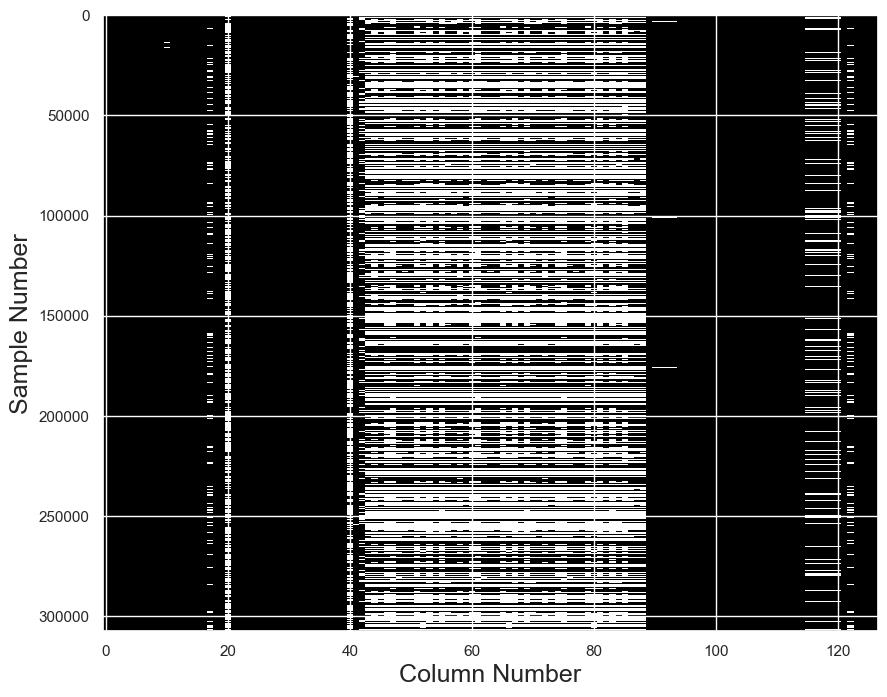

In [278]:
#Plotting missing columns
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

We can see that for some columns (number ~ 120-150) there is no data for all samples above ~205000

Let's look at a representation of missing features: 

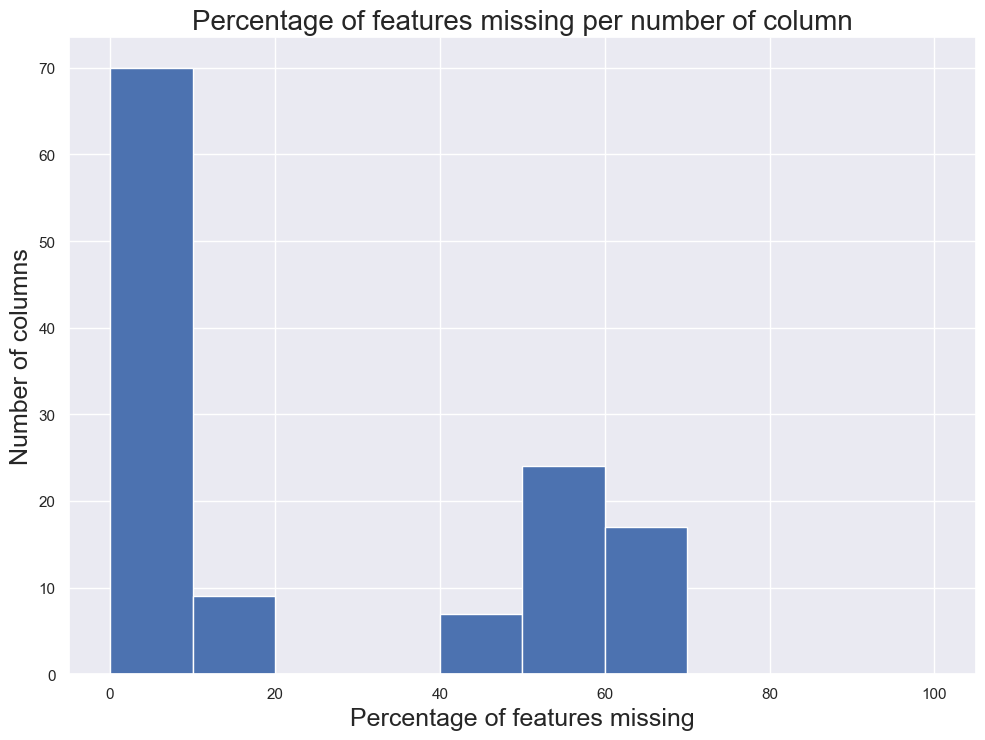

In [279]:
plt.hist(missing_value_df, bins = range(0,110,10))
plt.xlabel("Percentage of features missing")
plt.ylabel("Number of columns")
plt.title("Percentage of features missing per number of column")
plt.show()

In [9]:
#Dropping columns with more than x% na values
def drop_na_columns(df: pd.DataFrame, percent: float):
    n = len(df)
    cutoff = n*percent/100
    for c in df.columns:
        if len(df[c].dropna()) < cutoff:
            df.drop(columns={c}, inplace=True)

# app.info()

### 3.3 General Distribution

In [280]:
#Generate the number of continuous columns
cols_continuous = df.select_dtypes(include="number").nunique() >= 100

df_continuous = df[cols_continuous[cols_continuous].index]

print(df_continuous.shape)

#sns.pairplot(df_continuous);
#Too many continuous variables to plot pairplot

(307510, 52)


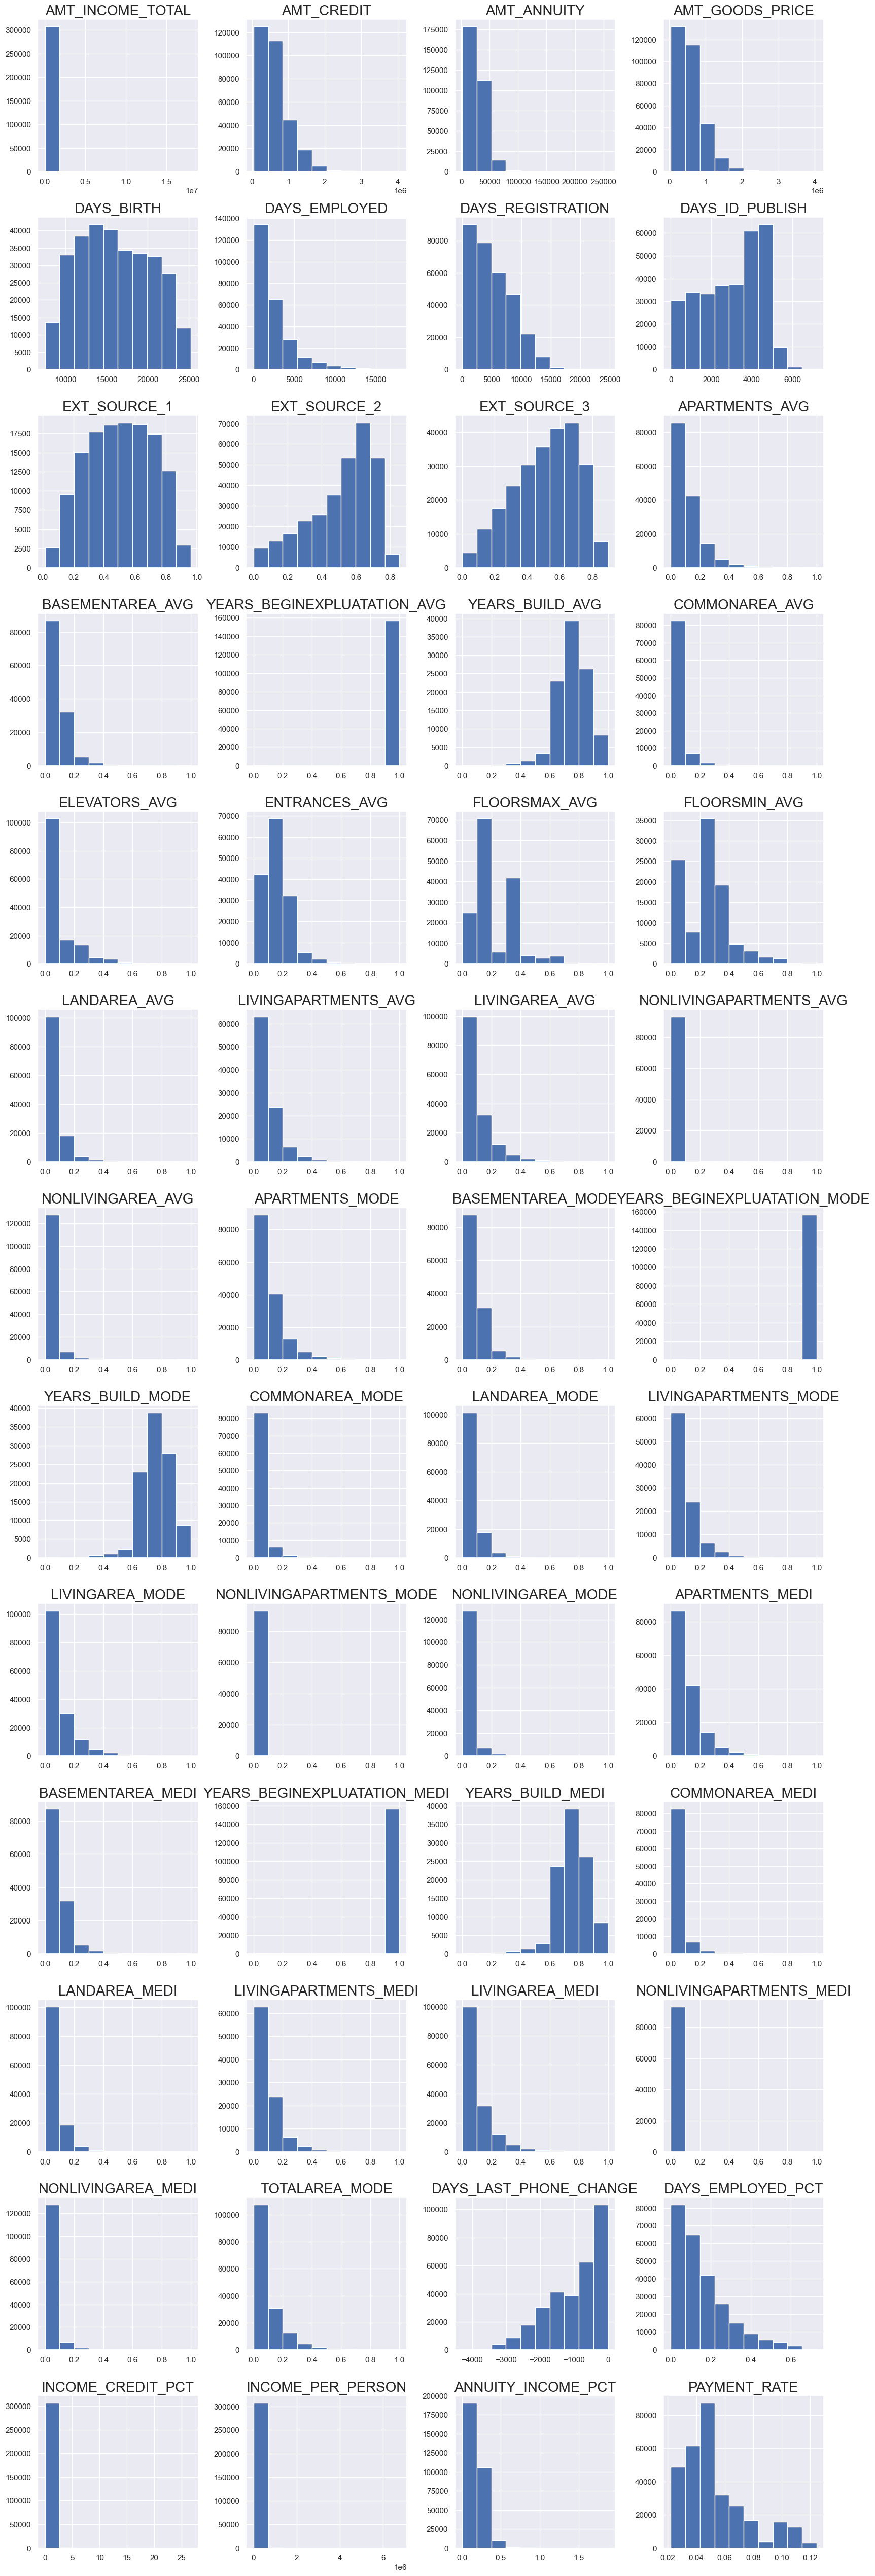

In [282]:
#Plotting a histogram of continuous variables
from functions import *
histPlotAll(df_continuous)

### 3.4 Feature correlation

We can now investigate the correlation between our features.
Since we have too many features, it is impossible to display a heatmap but we will look at the features with the most correlation.

#### 3.4.1 Correlation with target variable

In [283]:
df_corr = df.corr()

df_corr.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_LABEL,DAYS_EMPLOYED_PCT,INCOME_CREDIT_PCT,INCOME_PER_PERSON,ANNUITY_INCOME_PCT,PAYMENT_RATE
TARGET,1.000000,0.019179,-0.020460,-0.030369,-0.012816,-0.039644,-0.037220,-0.078232,-0.074952,-0.041981,-0.051463,0.037612,0.000534,0.045978,0.028530,0.000370,-0.023800,-0.001756,0.009298,0.058901,0.060894,-0.000142,-0.024173,0.005577,0.006945,0.002822,0.044399,0.051001,0.032524,-0.155319,-0.160453,-0.178898,-0.029496,-0.022749,-0.009729,-0.022149,-0.018550,-0.034185,-0.019187,-0.043996,-0.033614,-0.010886,-0.025031,-0.032989,-0.003176,-0.013578,-0.027283,-0.019957,-0.009038,-0.022068,...,-0.009994,-0.022326,-0.018573,-0.033850,-0.019039,-0.043760,-0.033394,-0.011257,-0.024621,-0.032731,-0.002757,-0.013337,-0.032590,0.009137,0.032252,0.009029,0.031280,0.055207,0.005417,0.044340,-0.002672,-0.000314,-0.028599,-0.001519,-0.008037,-0.004352,-0.001414,-0.004229,-0.000756,-0.011583,-0.009463,-0.006535,-0.011614,-0.003377,-0.007952,-0.001357,0.000216,0.003709,0.000931,0.002705,0.000790,-0.012459,-0.002018,0.019937,-0.075866,-0.067948,-0.009325,-0.014939,0.014287,0.012707
CNT_CHILDREN,0.019179,1.000000,0.025254,0.002146,0.021374,-0.001827,-0.025571,-0.330936,-0.061143,-0.183397,0.028018,0.008494,0.001041,0.240713,0.055631,-0.000794,-0.029904,0.022619,0.879160,0.025423,0.024781,0.003446,-0.007294,-0.013319,0.008185,0.014835,0.020073,0.070651,0.069959,-0.138469,-0.018009,-0.042705,-0.013221,-0.008464,0.006902,0.030172,0.000140,-0.007056,-0.008345,-0.009703,-0.008753,-0.003122,-0.008648,-0.010114,0.004051,0.000028,-0.012104,-0.008514,0.006199,0.029549,...,0.006401,0.030124,0.000609,-0.006743,-0.008328,-0.009445,-0.008231,-0.002820,-0.007962,-0.010065,0.004133,0.000061,-0.008035,0.015595,-0.001261,0.015233,-0.001860,-0.005868,0.001786,0.056836,-0.003709,-0.016736,-0.157023,-0.001498,0.051697,-0.001997,-0.002756,-0.005318,0.000293,0.003945,-0.005459,0.003609,0.010663,0.000773,0.004031,0.000864,0.000988,-0.002450,-0.000409,-0.000365,-0.002436,-0.010807,-0.007835,-0.041548,-0.322251,0.009987,0.017705,-0.322450,-0.002291,0.020752
AMT_INCOME_TOTAL,-0.020460,0.025254,1.000000,0.342170,0.417884,0.348698,0.165577,-0.056669,0.032221,-0.062354,-0.020038,-0.117273,0.000703,0.137821,-0.035725,-0.018216,0.002530,0.084490,0.032363,-0.185887,-0.199690,-0.00095

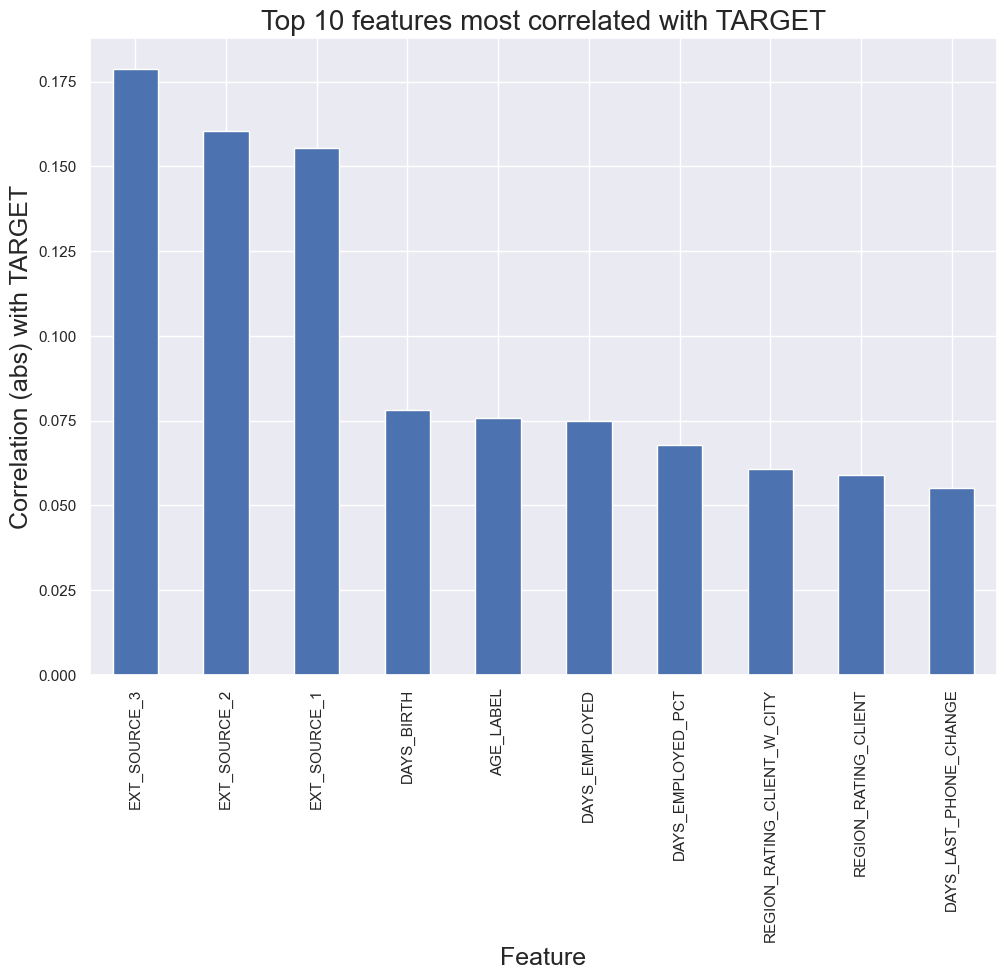

In [284]:
target_corr = pd.DataFrame(df_corr.TARGET)

#Turning correlation coefficients into absolute values
target_corr["TARGET"] = abs(target_corr["TARGET"])
target_corr.loc[target_corr["TARGET"] == 1, "TARGET"] = 0

target_corr = target_corr.sort_values(by="TARGET", ascending=False)
target_corr.head(10).plot(kind='bar', legend=None)
plt.xlabel("Feature")
plt.ylabel("Correlation (abs) with TARGET")
plt.title("Top 10 features most correlated with TARGET")
plt.show()

We can see that EXT_SOURCE 1, 2 and 3 are the features most correlated with TARGET.

#### 3.4.2 Inter Feature Correlation

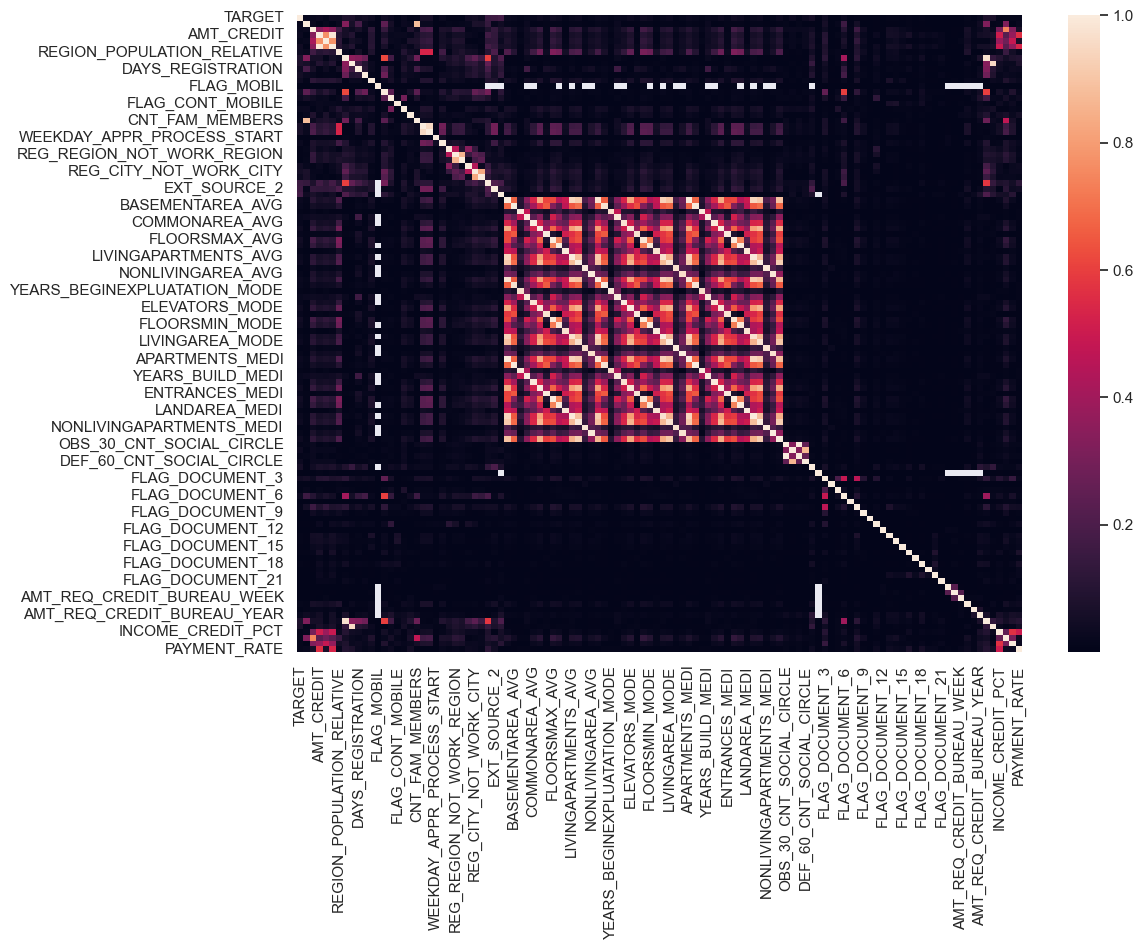

In [285]:
#Create a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

# Showing the lowest and highest correlations in the correlation matrix
df_corr = abs(df_corr)
sns.heatmap(df_corr)
plt.show()

We can see that several features are correlated. There are 3 particularly interesting areas of interest in this plot :
    
- CASH AND CC CORRELATED variables (bottom right)
- Correlation between the aggregates of base variables (top left)
- APP correlated variables (middle)

Since these correlation will negatively impact our model, we will have to remove them from our database.

## 4. Feature Engineering

We've now finished cleaning incorrect values. 
Before starting to perform data imputation, we need to perform a **train/validation/test split**. This will **prevent us from introducing data leakage during the cleaning process**. 

### 4.1 Performing train / test / validation split

We will divide our dataset as such : 

-  80% train set 
-  10% validation 
-  10% test

We will be able to revisit this values during the hyperparameter tuning part of the project.

In [10]:
from sklearn.model_selection import train_test_split

def perform_split(X, y , ID, target_col: str, validation_set: bool, shuffle: bool, random_state: int, test_size: float):

    #Splitting train and test sets, we have to add indices to conserve the original index
    X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
        X, y, ID, test_size=test_size, stratify=y, shuffle=shuffle, random_state=random_state)

    #Assigning the correct indices (the SK_IDs) to y_test
    y_test.index = indices_test
    
    if validation_set:
        #Applying the same function to separate train and validation set
        X_train, X_val, y_train, y_val, indices_train, indices_val = train_test_split(
            X_train, y_train, indices_train, test_size = test_size/(1-test_size), 
            shuffle=shuffle, random_state=random_state)

        #Assigning the SK IDs to y_train and y_val
        y_val.index = indices_val
        y_train.index = indices_train
        return X_train, y_train, X_test, y_test, X_val, y_val
    
    y_train.index = indices_train
    return X_train, y_train, X_test, y_test


In [67]:
# print(len(X_train), len(X_test), len(X_val))
#Our test and validation set have the same length and its 10% of the overall length of X

Now that we have performed the split, we can carry on to perform data imputation.

These operations will also have to be performed on the test and train_set, so we will create a function that we will be able to apply to the 3 sets.

### 4.2 Data Imputation

First we will investigate what columns still have missing values. 
Normally, we have replaced all missing features for categorical variables.

In [68]:
# #For ease of use, we will rename X_train to df so we can better replicate our code afterwards
# df = X_train.copy()

# def check_col_nas_type(df: pd.DataFrame):
#     type_cols = []
#     #Verifying the type of columns with missing values
#     for c in df.columns[df.isna().any()].tolist():
#         if ~np.isin(df[c].dtype, type_cols):
#             type_cols.append(df[c].dtype)
#     return(type_cols)

# check_col_nas_type(df)
# #This verifies that we only need to perform data imputation on numeric features

In [11]:
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#Defining a data imputation function, we will use the NAME_CONTRACT_TYPE as a category_column

#This data_imputation script can be improved during the hyperparameter setting phase

def data_imputation(df: pd.DataFrame, max_unique_values=3, use_categ_column=False, category_column='NAME_CONTRACT_TYPE'):
    
    #Replacing infinite values from division by small numbers
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    #Creating a copy of our dataset with numeric values to perform KS test
    df_imput = df.select_dtypes(include='number')
    num_cols = df_imput.columns
    df_imput = pd.DataFrame(StandardScaler().fit_transform(df_imput), columns=num_cols).dropna()

    #Creating a list of columns with missing values
    missing_cols = df.loc[:, df.isna().any()].columns
    
    #Iterating over columns with missing data
    for c in missing_cols:
        
        #Verifying that we are in a numeric column
        if np.isin(c, num_cols):
            
            #If there are less or equal to max unique values, we will use mode imputation 
            if len(df[c].unique()) <= max_unique_values:
                
                if use_categ_column:
                            
                    #We will create a subset from our categorical variable and perform mode imputation
                    for t in df[category_column].unique():
                        #Creating subset
                        subset = df.loc[df[category_column] == t]

                        #Calculating mode of subset
                        mode = subset[c].mode().values[0]

                        #Applying imputation
                        df.loc[(df[c].isna()) & (df[category_column] == t), c] = mode
                
                else:
                    df[c] = df[c].fillna(df[c].mode().values[0])
                            
            #If we have more numeric values, we will calculate the Kolmogorov Smirnoff pvalue to test for normalization
            else:

                #Calculating pvalue of KS test
                pval = stats.kstest(df_imput[c], 'norm').pvalue
                
                if pval >= 0.05:
                #P value is superior to 0.05, we cannot reject the null hypothesis and thus conclude the variable is
                #approximatively normally distributed
                #We will use mean imputation on that variable                    
                    if use_categ_column:

                        for t in df[category_column].unique():
                            #Creating subset
                            subset = df.loc[df[category_column] == t]

                            #Calculating mean based on that subset and our target column
                            mean = subset[c].mean()

                            #Applying imputation
                            df.loc[(df[c].isna()) & (df[category_column] == t), c] = mean

                    else:
                        df[c] = df[c].fillna(df[c].mean())
                            
                else:
                    
                    if use_categ_column:
                        
                        #P value is inferior to 0.05, we can reject the null hypothesis and thus conclude the variable is
                        #not normally distributed
                        #We will use median imputation on that variable
                        for t in df[category_column].unique():
                            #Creating subset
                            subset = df.loc[df[category_column] == t]

                            #Calculating mean based on that subset and our target column
                            med = subset[c].median()

                            #Applying imputation
                            df.loc[(df[c].isna()) & (df[category_column] == t), c] = med
                            
                    else:
                        df[c] = df[c].fillna(df[c].median())
                        
        #Less categories              
        else: 
            df[c] = df[c].fillna(df[c].median())              

# #Applying the function to our 3 sets (X_train has been renamed to df)
# numeric_data_imputation(df, 'NAME_CONTRACT_TYPE')
# numeric_data_imputation(X_test, 'NAME_CONTRACT_TYPE')
# numeric_data_imputation(X_val, 'NAME_CONTRACT_TYPE')

#Checking for nulls in our 3 sets
# for data in [df,X_test,X_val]:
#     print(np.count_nonzero(data.isnull()))
    
#We have no more NA values in all 3 sets

We will now reencode cyclical features.

### 4.3 Encoding Cyclical Features

We have 2 columns with time features that are cyclical in nature but coded with numbers.

- WEEDKAY_APPR_PROCESS_START
- HOUR_APPR_PROCESS_START

To increase the performance of our algorithm, we will apply a cyclical encoding algorithm to better represent their cyclical nature :

In [12]:
def encode_cyclical_vars(df: pd.DataFrame, cyclical_vars=["WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START"]):
    for c in cyclical_vars:
        #Calculating the number of unique values
        n = len(df[c].unique())
        #Defining variable names
        cos_var = c + '_cos'
        sin_var = c + '_sin'
        #Calculating cyclical encoder variables
        df[sin_var] = np.sin(df[c] * (2*np.pi/n))
        df[cos_var] = np.cos(df[c] * (2*np.pi/n))
        #Dropping the base columns
        df.drop(columns = {c}, inplace=True)

# encode_cyclical_vars(df)
# encode_cyclical_vars(X_test)
# encode_cyclical_vars(X_val)

# df.head()

### 4.4 Encoding categorical variables

Since our algorithms are only able to use numeric variables, we will need to **encode categorical variables**.

For variables with a small number of categories, we will perform **One-Hot Encoding**.

If there are more than 10 categories, we will perform **Weight of Evidence (WoE) encoding** instead to avoid a sharp increase in the dimensionality of our dataset.

In [13]:
from category_encoders import WOEEncoder
import category_encoders as ce
from category_encoders.binary import BinaryEncoder
from category_encoders.ordinal import OrdinalEncoder


def encode_cat_vars(df: pd.DataFrame, X_train: pd.DataFrame, y_train, max_categ: int, full_encode=None,
                    drop_invariant=False, woe_encode=True):
    
    #Defining a version that ordinal encodes everything
    if full_encode == 'ordinal':
        ord_enc = OrdinalEncoder(drop_invariant=drop_invariant, return_df=True).fit(X_train)
        df = ord_enc.transform(df)
        return df
    
    #Defining an encoder that woe_encodes everything
    if full_encode == 'woe':
        woe_encoder = WOEEncoder(drop_invariant=drop_invariant, return_df=True).fit(X_train, y_train)
        df = woe_encoder.transform(df)
        return df
    
    if full_encode == 'ohe':
        ohe_encoder = ce.one_hot.OneHotEncoder(return_df= True, drop_invariant=drop_invariant).fit(X_train)
        df = ohe_encoder.transform(df)
        return df
        
    woe_cols = []
    ohe_cols = []
    label_cols = []
    for c in X_train.columns:
        
        #Keeping only categorical columns
        if not np.issubdtype(X_train[c].dtype,np.number):
            
            #If only 2 categories, performing Label encoding
            if len(X_train[c].unique()) == 2:
                label_cols.append(c)
            
            #If more than X categories, performing WOE encoding
            elif len(X_train[c].unique()) >= max_categ:
                woe_cols.append(c)
            
            else: 
                #One hot encoding and remove the original column
                ohe_cols.append(c)
                
    #Defining Binary Encoder based on the train dataset and applying it to df
    bin_enc = BinaryEncoder(cols= label_cols, drop_invariant=drop_invariant, return_df=True).fit(X_train)
    X_train_encoded = bin_enc.transform(X_train)
    df = bin_enc.transform(df)
    
    if woe_encode:
        #Defining WOE Encoder and fitting it to the TRAIN dataset
        woe_encoder = WOEEncoder(cols = woe_cols, drop_invariant=drop_invariant, return_df=True).fit(X_train_encoded, y_train)
        X_train_encoded = woe_encoder.transform(X_train_encoded)
        #Fitting the encoder to the selected dataframe
        df = woe_encoder.transform(df)
    else: #Perform label (ordinal) encoding
        label_encoder = LabelEncoder(cols=woe_cols, drop_invariant=drop_invariant, return_df=True).fit(X_train_encoded)
        X_train_encoded = label_encoder.transform(X_train_encoded)
        df = label_encoder.transform(df)
    
    #Performing one hot encoding on selected columns
    ohe_encoder = ce.one_hot.OneHotEncoder(cols=ohe_cols, return_df= True, drop_invariant=drop_invariant).fit(X_train_encoded)
    df = ohe_encoder.transform(df)
    
    
    del X_train_encoded
    return df

#Just a reminder that once again df = X_train
#We apply all this function to our 3 sets
# X_test = encode_cat_vars(X_test, df, y_train, 10)
# X_val = encode_cat_vars(X_val, df, y_train, 10)
# df = encode_cat_vars(df, df, y_train, 10)

In [73]:
# def check_dtypes(df: pd.DataFrame):
#     type_cols = []
#     for c in df.columns:
#         if not np.isin(df[c].dtype, type_cols):
#             type_cols.append(df[c].dtype)
#     print(type_cols)

# check_dtypes(df)
# check_dtypes(X_test)
# check_dtypes(X_val)

In [74]:
# print(df.shape, X_test.shape, X_val.shape)

### 4.5 Resampling our training dataset

As we've seen at the beginning of this part, our dataset has a very big imbalance with 92% of rows with the TARGET = 0 and only 8% with the Target variable equal to 1.

To reduce this imbalance, we will perform oversampling on our minority class.

Of course, **oversampling will only be performed on our train set**.

In [14]:
#Importing imblearn to be able to apply different kinds of oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN

def over_sample_train(X_train, y_train, method='ADASYN', ratio=1):
    
    if method == 'SMOTE':
        #Importing the SMOTE algorithm with default values
        sm = SMOTE(sampling_strategy=ratio)

        #Generating our resampled dataset
        X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    
    elif method == 'SVMSMOTE':
        svm = SVMSMOTE(sampling_strategy=ratio)
        #Generating our resampled dataset
        X_train_res, y_train_res = svm.fit_resample(X_train, y_train)
        
    else:
        ada = ADASYN(sampling_strategy=ratio)
        #Generating our resampled dataset
        X_train_res, y_train_res = ada.fit_resample(X_train, y_train)
    
    return X_train_res, y_train_res, X_train, y_train
        

# print(X_train_res.shape)
# print(y_train_res.value_counts())
# #We have successfully removed the imbalance from our dataset and equalized the number of observations for each class

In [76]:
# #Renaming the resampled variables for ease of use
# X_train_initial = df.copy()
# y_train_initial = y_train

# X_train = X_train_res.copy()
# y_train = y_train_res

In [14]:
#Deleting some variables to clear memory
import sys
def sizeof_fmt(num, suffix='B'):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:20]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))


                          _i10:  4.5 KiB
                           _ii:  3.1 KiB
                          _i12:  3.1 KiB
                           _i3:  1.9 KiB
                            _i:  1.2 KiB
                          _i13:  1.2 KiB
                           _i9:  1.2 KiB
                 SimpleImputer:  1.0 KiB
                StandardScaler:  1.0 KiB
                    WOEEncoder:  1.0 KiB
                 BinaryEncoder:  1.0 KiB
                OrdinalEncoder:  1.0 KiB
                         SMOTE:  1.0 KiB
                      SVMSMOTE:  1.0 KiB
                        ADASYN:  1.0 KiB
                           _i2:  830.0 B
                           _i8:  770.0 B
                          _iii:  695.0 B
                          _i11:  695.0 B
                           _i4:  666.0 B


In [287]:
gc.enable()
del prev_app, bureau_balance, cash, bureau, install
gc.collect()

232101

Now that we have resampled our dataset, we want to perform **feature selection** to reduce the number of features and prevent overfitting.

## 5. Feature Selection

### 5.1 Removing low variance features

In [15]:
# Perform feature selection using a variance threshold
from sklearn.feature_selection import VarianceThreshold

def perform_variance_selection(X_train, X_test, X_val=None, validation_set=False, threshold=0.02):
    
    initial_cols = X_train.columns
    #We select 2% as our variance threshold, but this is a hyperparameter that we will be able to optimize later
    sel = VarianceThreshold(threshold=threshold)
    sel.fit(X_train)
    #Using our selector to remove columns from our 3 sets
    X_train_sel = sel.transform(X_train)
    X_test_sel = sel.transform(X_test)
    if validation_set:
        X_val_sel = sel.transform(X_val)

    #Creating a list of encoded columns to preserve their names
    i = 0
    #Retrieving the boolean values for each column (is the column kept or not)
    boolean_cols = sel.get_support()
    encoded_cols = []
    for i in range(len(initial_cols)):
        if boolean_cols[i] == True:
            encoded_cols.append(initial_cols[i])
        i += 1

    #The selector has transformed our dataframes into np array, let's turn them back into a DataFrame
    X_train = pd.DataFrame(X_train_sel, columns=encoded_cols)
    X_test = pd.DataFrame(X_test_sel, columns=encoded_cols)
    
    if validation_set:
        X_val = pd.DataFrame(X_val_sel, columns=encoded_cols)
        return X_train, X_test, X_val
    
    return X_train, X_test

### 5.2 Removing highly correlated features

In [16]:
# Function to list features that are correlated
# Adds the first of the correlated pair only (not both)
def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = pd.DataFrame(dataset).corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i])
    df = dataset.copy()
    df = pd.DataFrame(df).drop(correlated_columns, axis=1)
    return df

# cf = correlatedFeatures(X_train, 0.85)
# cf

In [80]:
# #Removing our highly correlated features
# X_train = X_train.drop(cf, axis=1)
# X_test = X_test.drop(cf, axis=1)
# X_val = X_val.drop(cf, axis=1)

# print(X_train.shape, X_test.shape, X_val.shape)

### 5.3 Selecting best features

We will now use the Kbest algorithm to select the X best features

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def perform_kbest_selection(X_train, X_test, y_train, k: int):

    kbest = SelectKBest(score_func=f_regression, k=k)
    kbest.fit(X_train, y_train)
    X_train_sel = kbest.transform(X_train)
    X_test_sel = kbest.transform(X_test)
    
    return X_train_sel, X_test_sel
    


In [82]:
# X_train_sel = kbest.transform(X_train)
# X_val_sel = kbest.transform(X_val)
# X_test_sel = kbest.transform(X_test)

### 5.4 Compoud Selector Function

In [18]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

def select_features(X_train, X_test, y_train, var_threshold=0.02, corr_threshold=0.9, k=10,
                    unique_select=None, max_boruta_iter=50):
    
    if unique_select == 'boruta':
        rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5, n_jobs=-1)
        boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1, max_iter=50)
        boruta_selector.fit(np.array(X_train), np.array(y_train)) 
        
        X_important_train = boruta_selector.transform(np.array(X_train))
        X_important_test = boruta_selector.transform(np.array(X_test))
        
        return X_important_train, X_important_test
    
    elif unique_select == 'kbest':
        return perform_kbest_selection(X_train, X_test, y_train, k)
    
    elif unique_select == 'variance':
        X_train, X_test = perform_variance_selection(X_train, X_test, threshold=var_threshold)
        return X_train, X_test

    cf = correlatedFeatures(X_train, corr_threshold)
    X_train = X_train.drop(cf, axis=1)
    X_test = X_test.drop(cf, axis=1)
    if unique_select == 'correlation':
        return X_train, X_test

    X_train, X_test = perform_variance_selection(X_train, X_test, threshold=var_threshold)
        
    return X_train, X_test



## 6. Model training

The client asked for an **easy to interpret** model with an **indication of the importance of each variable** in determining the probability outcome. 

We will thus compare and tune the 2 following models:

- A **Logistic Regression model**
- A **Decision Tree Classifier**

### 6.1 Selecting a Performance Metric

Our task is to try to detect as many "bad borrowers" as possible while avoiding false negatives and losing too many clients.

My interpretation is that we want to strike the best balance between **precision and recall**, so we will use the **ROC AUC SCORE** as the performance metric for this project.

### 6.2 Calculating a Baseline

For this project, the baseline will be a model that predicts that **we can lend money to all borrowers** (TARGET = 0).

Let's calculate the ROC AUC, accuracy and precision for such a model :

In [84]:
#Loading the dataset 
df = pd.read_csv("Data/application_train.csv", sep=",")

df["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [85]:
#Calculating ROC AUC
from sklearn.metrics import roc_auc_score, precision_score, accuracy_score
y = df["TARGET"]
X = df.drop(columns={"TARGET"})
#Creating y_predict with the same size as y but only negative values
y_predict = pd.DataFrame(y)
y_predict["TARGET"] = 0
y_predict = y_predict.squeeze()

print("ROC :",roc_auc_score(y, y_predict))
print("Accuracy:", accuracy_score(y, y_predict))
print("Precision:",precision_score(y, y_predict, zero_division=0))

ROC : 0.5
Accuracy: 0.9192711805431351
Precision: 0.0


As we can see, our model has a ROC of 0.5 and a very high accuracy of 92%, but our precision is 0 since it doesn't detect any potentially "bad" borrowers.

### 6.3 Preprocessing Pipeline

We will create the preprocessing pipeline below:

In [19]:
#Loading dataframes
df = pd.read_csv("Data/application_train.csv")
prev_app_df = pd.read_csv("Data/prev_app_df.csv")
bureau_df = pd.read_csv("Data/bureau_df.csv")
cash_df = pd.read_csv("Data/cash_df.csv")
cc_df = pd.read_csv("Data/cc_df.csv")
install_df = pd.read_csv("Data/install_df.csv") 

#Preprocessing
preprocess_cat_vars(df)
df = preprocess_num_vars(df)

#Loading information from external csv files
df = load_prev_app_info(df)
df = load_bureau_info(df)
df = load_cash_info(df)
df = load_cc_info(df)
df = load_install_info(df)

#Replacing infinite values with np.nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)

#Na removal
print("Number of features before na removal:", len(df.columns))
drop_na_columns(df, 20)
print("Number of features after na removal:", len(df.columns))

#Encoding cyclical vars
encode_cyclical_vars(df)

Number of features before na removal: 508
Number of features after na removal: 480


We now perform the train/test split **before imputation** in order to prevent **data leakage**.

In [20]:
#Performing train-test split
X = df.drop(columns={"TARGET"})
y = df["TARGET"]
ID = df.index

X_train, y_train, X_test, y_test, X_val, y_val = perform_split(X, y, ID, target_col='TARGET',
                                                 validation_set=True, shuffle=True, random_state=10, test_size=0.1)

# #Further preprocessing is done in the preprocess_pipe below

# #Encoding variables
# print("Encoding cat vars",X_train.shape, X_test.shape)
# X_test = encode_cat_vars(X_test, X_train, y_train, max_categ=5, full_encode=False)
# X_val = encode_cat_vars(X_val, X_train, y_train, max_categ=5, full_encode=False)
# X_train = encode_cat_vars(X_train, X_train, y_train, max_categ=5, full_encode=False)
# X_train, X_test = X_train.align(X_test, join='left', axis=1)
# X_train, X_val = X_train.align(X_val, join='left', axis=1)
# print("Finished encoding variables",X_train.shape, X_test.shape)

# # #Performing data imputation
# data_imputation(X_train)
# data_imputation(X_test)
# data_imputation(X_val)

# #Oversampling
# X_train, y_train, X_train_init, y_train_init = over_sample_train(X_train, y_train)

# #Feature selection
# X_train, X_test, X_val = perform_variance_selection(X_train, X_test, X_val, validation_set=True)

In [88]:
#Dumping our variables using joblib for later use and so they can be removed from memory

# import joblib

# joblib.dump(X_train, 'X_train.pkl')
# joblib.dump(X_test, 'X_test.pkl')
# joblib.dump(X_val, 'X_val.pkl')
# joblib.dump(y_train, 'y_train.pkl')
# joblib.dump(y_test, 'y_test.pkl')
# joblib.dump(y_val, 'y_val.pkl')

In [21]:
#Defining a function to reduce memory usage to prevent memory overload issues

def reduce_mem_usage(dataframe):
    for col in dataframe.columns:
        col_type = dataframe[col].dtype
        if col_type != object:
            c_min = dataframe[col].min()
            c_max = dataframe[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    dataframe[col] = dataframe[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    dataframe[col] = dataframe[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    dataframe[col] = dataframe[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    dataframe[col] = dataframe[col].astype(np.int64)
                elif str(col_type)[:5] == 'float':
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        dataframe[col] = dataframe[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        dataframe[col] = dataframe[col].astype(np.float32)
                    else:
                        dataframe[col] = dataframe[col].astype(np.float64)
    return dataframe

In [22]:
#Creating a preprocessing pipeline with the steps above

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from category_encoders.woe import WOEEncoder, OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN



#Defining the maximum number of categories where OHE will be applied
max_categ = 5

#Separating our columns depending on the number of categories for ColumnTransformer
binary_cat_cols = df.select_dtypes(include=object).loc[:, df.nunique() <= 2].columns.to_list()
low_unique_cat_cols = df.select_dtypes(include=object).loc[
    :, (df.nunique() <= max_categ) & (df.nunique() > 2)].columns.to_list()
high_unique_cat_cols = [c for c in df.select_dtypes(include=object).columns if
                        (c not in low_unique_cat_cols) and (c not in binary_cat_cols)]
#num_cols = df.select_dtypes(include=np.number).columns.to_list()

#Creating ColumnTransformer that will apply different categorical variable encoding algorithms depending on the number of cats
cat_encode = ColumnTransformer(
    [('ohe', OneHotEncoder(handle_unknown = 'ignore'), low_unique_cat_cols),
     ('label', OrdinalEncoder(), binary_cat_cols),
     ('woe', WOEEncoder(), high_unique_cat_cols)],
     remainder='passthrough')

#Defining our first iteration of the pipeline
preprocess_pipe = Pipeline([
    ('cat_encode', cat_encode),
    ('imputation', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('variance_select', VarianceThreshold(threshold=0.02)),
    ('over_sampling', ADASYN())
    ], memory="./Cache/")

preprocess_pipe

Pipeline(memory='./Cache/',
         steps=[('cat_encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CODE_GENDER',
                                                   'NAME_EDUCATION_TYPE',
                                                   'FONDKAPREMONT_MODE',
                                                   'HOUSETYPE_MODE',
                                                   'EMERGENCYSTATE_MODE']),
                                                 ('label', OrdinalEncoder(),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY']),
                                                 ('woe', WOEEncoder(),
                                                  ['NAME_TYPE_SUITE',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_HOUSING_TYPE',
                                                   'OCCUPATION_TYPE',
                                                   'ORGANIZATION_TYPE',
                                                   'WALLSMATERIAL_MODE'])])),
                ('imputation', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('variance_select', VarianceThreshold(threshold=0.02)),
                ('over_sampling', ADASYN())])

In [23]:
#Reducing memory usage from X_train and clearing our memory from other variables we will not use in the future
X_train_reduced = reduce_mem_usage(X_train)
import gc
gc.enable()
del prev_app_df, bureau_df, cash_df, cc_df, install_df
del df, X_train 
gc.collect()

0

### 6.4 Base Logistic Regression Model

Now that've defined our preprocessing pipeline, we will use a Logistic regression as a first model :

In [25]:
#Defining all modules that will be needed for this part 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
import joblib
from sklearn.base import clone
#Import tqdm to visualize algorithm run
from tqdm.notebook import tqdm,tnrange
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer, PowerTransformer

In [210]:
#We need to scale the dataset before applying Logistic Regression because sklearn log_r includes L2 regularization
pipe_lr = clone(preprocess_pipe)
pipe_lr.steps.append(('log_r', LogisticRegression()))

pipe_lr.fit(X_train_reduced, y_train)
train_predictions = pipe_lr.predict(X_train_reduced)
val_predictions = pipe_lr.predict(X_val)

print("Logistic Regression results")
print("TRAIN:")
print("ROC AUC train : {:.5f}".format(roc_auc_score(y_train, train_predictions)))
print("----------------------")
print("TEST:")
print(classification_report(y_val, val_predictions))
print(confusion_matrix(y_val, val_predictions))
print("ROC AUC test : {:.5f}".format(roc_auc_score(y_val, val_predictions)))

Logistic Regression results
TRAIN:
ROC AUC train : 0.68985
----------------------
TEST:
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     28291
           1       0.17      0.66      0.27      2461

    accuracy                           0.71     30752
   macro avg       0.56      0.69      0.54     30752
weighted avg       0.90      0.71      0.78     30752

[[20255  8036]
 [  848  1613]]
ROC AUC test : 0.68569


In [85]:
def pipe_fit_roc(X_train, y_train, X_test, y_test, pipe):

    pipe.fit(X_train, y_train)
    train_predictions = pipe.predict(X_train)
    test_predictions = pipe.predict(X_test)

    roc_train = roc_auc_score(y_train, train_predictions) 
    roc_test = roc_auc_score(y_test, test_predictions)
    
    return roc_train, roc_test

The ROC AUC is **better than our baseline model**. But it is still relatively low and can be improved.

We will now apply Ridge Regression Classifier to our dataset to try to optimize our results. It is an optimized version of the Logistic Regression algorithm with penalties added for high number of features. 

### 6.5 Ridge Classifier 

Let's now try to apply a Ridge Classifier to our dataset.

In [211]:
pipe_r = clone(preprocess_pipe)
pipe_r.steps.append(('ridge', RidgeClassifier()))

pipe_r.fit(X_train_reduced, y_train)
train_predictions = pipe_r.predict(X_train_reduced)
val_predictions = pipe_r.predict(X_val)

print("Logistic Regression results")
print("TRAIN:")
print("ROC AUC train : {:.5f}".format(roc_auc_score(y_train, train_predictions)))
print("----------------------")
print("TEST:")
print(classification_report(y_val, val_predictions))
print(confusion_matrix(y_val, val_predictions))
print("ROC AUC test : {:.5f}".format(roc_auc_score(y_val, val_predictions)))

Logistic Regression results
TRAIN:
ROC AUC train : 0.69134
----------------------
TEST:
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     28291
           1       0.17      0.66      0.27      2461

    accuracy                           0.71     30752
   macro avg       0.56      0.69      0.54     30752
weighted avg       0.90      0.71      0.77     30752

[[20108  8183]
 [  827  1634]]
ROC AUC test : 0.68736


The **ROC AUC of the Ridge model is slightly better than Logistic Regression**. Let's see if we can get better results with a Decision Tree Classifier :

### 6.6 Base Decision Tree model

In [212]:
pipe_dt = clone(preprocess_pipe)
pipe_dt.steps.append(('dt', DecisionTreeClassifier()))

pipe_dt.fit(X_train_reduced, y_train)
train_predictions = pipe_dt.predict(X_train_reduced)
val_predictions = pipe_dt.predict(X_val)

print("Logistic Regression results")
print("TRAIN:")
print("ROC AUC train : {:.5f}".format(roc_auc_score(y_train, train_predictions)))
print("----------------------")
print("TEST:")
print(classification_report(y_val, val_predictions))
print(confusion_matrix(y_val, val_predictions))
print("ROC AUC test : {:.5f}".format(roc_auc_score(y_val, val_predictions)))

Logistic Regression results
TRAIN:
ROC AUC train : 1.00000
----------------------
TEST:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     28291
           1       0.13      0.18      0.15      2461

    accuracy                           0.83     30752
   macro avg       0.53      0.54      0.53     30752
weighted avg       0.86      0.83      0.85     30752

[[25130  3161]
 [ 2007   454]]
ROC AUC test : 0.53637


In [86]:
def dt_classifier(X_train, X_test):
    
    pipe_dtc = Pipeline([('scaler', StandardScaler()), 
                    ('dtc', DecisionTreeClassifier())])

    pipe_dtc.fit(X_train, y_train)
    train_predictions = pipe_dtc.predict(X_train)
    test_predictions = pipe_dtc.predict(X_test)
    
    roc_train = roc_auc_score(y_train, train_predictions) 
    roc_test = roc_auc_score(y_test, test_predictions)
    
    return roc_train, roc_test

Unsurprisingly, the **Decision Tree is overfitting** with a ROC AUC train of 1 but a ROC AUC test of 0.54.

The results are way below what we would have expected though, it seems that this model is not very well adapted to the high number of features in our dataset. We will still try to find optimized hyperparameters to try to improve its results in the next section.

## 7. Model Performance Tuning

We will start by tuning the hyperparameters of our 3 candidate models.

### 7.1 Model Hyperparameter tuning

Now that we've selected ideal scalers for both models, we will tune hyperparameters to increase our performance indicator ==> ROC AUC. We will use the scikit-optimize **Bayesian Search (CV)** algorithm to perform this hyperparameter tuning in order to gain time and performance.

In [96]:
#Defining X_train_reduced for memory saving purposes
X_train_reduced = reduce_mem_usage(X_train)

#### 7.1.1 Logistic Regression

In [213]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
warnings.filterwarnings("ignore")

# from joblib import parallel_backend

#X_train_reduced = reduce_mem_usage(X_train)

#Define a list of hyperparameters we want to tune
params = {
    'logr__penalty' : Categorical(['l1','l2', 'elasticnet']), 
    'logr__C'       : Real(1e-3,1e+3, prior='log-uniform'),
    'logr__l1_ratio': Real(.1, .9)
}

#Defining our logistic regression pipeline
pipe = clone(preprocess_pipe)
pipe.steps.append(('logr',LogisticRegression(solver='saga')))

# define the search
search = BayesSearchCV(pipe,
                       params,
                       n_jobs=-1,
                       pre_dispatch= 3,
                       scoring='roc_auc',
                       cv=3,
                       n_iter=30,
                       verbose=10)

search.fit(X_train_reduced,y_train)

print("tuned hpyerparameters :(best parameters) ",search.best_params_)
print("ROC AUC :",search.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [214]:
#Saving GridSearchCV object
import joblib

joblib.dump(search, 'bayesian_search_LR.pkl')


['bayesian_search_LR.pkl']

Optimizing the hyperparameters for Logistic Regression **improves our model by increasing our ROC AUC to 0.75**. 

The best hyperparameters are the following :

-  C = 0.001
- l1_ratio = 0.1
- penalty = elasticnet

Let's now apply the same process to our Ridge Regression algorithm.

#### 7.2.2 Ridge Hyperparameter tuning

In [94]:
# import joblib
# X_train = joblib.load('X_train.pkl')
# y_train = joblib.load('y_train.pkl')
X_train_reduced = reduce_mem_usage(X_train)

In [216]:
#Define a list of hyperparameters we want to tune
params = {
    'ridge__alpha': Real(1e-4, 1e1, prior='log-uniform')
             }

#Defining our Ridge pipeline
pipe = clone(preprocess_pipe)
pipe.steps.append(('ridge',RidgeClassifier()))

#Defining our Bayesian Search Operator
bs_r = BayesSearchCV(pipe,
              params,
              n_jobs=-1,
              pre_dispatch= 3,
              scoring='roc_auc',
              cv=3,
              n_iter=30,
              verbose=10)

bs_r.fit(X_train_reduced,y_train)

print("tuned hpyerparameters :(best parameters) ",bs_r.best_params_)
print("ROC AUC :",bs_r.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [217]:
import joblib
joblib.dump(bs_r, 'randomized_search_ridge.pkl')

['randomized_search_ridge.pkl']

Once again, our **Ridge Classifier is slightly more performant than our Logstic Regression algorithm** with a ROC AUC SCORE of 0.7515. 

The optimized hyperparameter is : 

- alpha = 6.967

#### 7.2.3 Decision Tree Hyperparameter tuning

In [218]:
#Define a list of hyperparameters we want to tune
params = {
    'dt__max_features': Categorical(['auto', 'sqrt', 'log2']),
    'dt__ccp_alpha': Real(1e-3, 1e0, prior='log-uniform'),
    'dt__max_depth' : Integer(1,10),
    'dt__criterion' :Categorical(['gini', 'entropy'])
}

#Defining our Decision Tree pipeline
pipe = clone(preprocess_pipe)
pipe.steps.append(('dt', DecisionTreeClassifier()))

# define the search
search_dt = BayesSearchCV(pipe,
                       params,
                       n_jobs=-1,
                       pre_dispatch= 3,
                       scoring='roc_auc',
                       cv=3,
                       n_iter=30,
                       verbose=10)

search_dt.fit(X_train_reduced,y_train)

print("tuned hpyerparameters :(best parameters) ",search_dt.best_params_)
print("ROC AUC :",search_dt.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [219]:
joblib.dump(search_dt, 'bayesian_search_dt.pkl')

['bayesian_search_dt.pkl']

Our decision tree classifier has much worse performance than both our linear classification models.

We are not able to go above 0.61 which is really not ideal for a model.

In conclusion, it seems that our **Ridge Classifier model is the best** with the following parameters :

- alpha = 6.967

We will however verify that by cross validating each model against the others in the next section.

### 7.2 Model Selection

We will know apply our 3 best models to our train set using cross validation to select the best candidate.

In [231]:
from tqdm.notebook import tqdm,tnrange
from sklearn.model_selection import KFold
#Creating K-fold validation leaves
k = 5
kf = KFold(n_splits=k, shuffle=True)

scores = []

#Defining the pipelines:
#We clone our preprocess_pipe
pipe_dt = clone(preprocess_pipe)
#And append a classifier at the end of it
pipe_dt.steps.append(('dt', DecisionTreeClassifier(ccp_alpha= 0.001,
                                                    criterion='gini',
                                                    max_depth=8,
                                                    max_features='sqrt')))

pipe_r = clone(preprocess_pipe)
pipe_r.steps.append(('ridge',RidgeClassifier(alpha=6.967)))

pipe_logr = clone(preprocess_pipe)
pipe_logr.steps.append(('logr',LogisticRegression(solver='saga',
                                                 C=0.001,
                                                 l1_ratio=0.1,
                                                 penalty='elasticnet',
                                                 max_iter=1000)))

#Defining the pipelines we want to test
pipes = [[pipe_dt, "Decision Tree"], [pipe_r, "Ridge Classifier"], [pipe_logr, "Logistic Regression"]]

#Recreating a merged X_train/y_train that we will feed to our cross validation algorithm
X = pd.merge(X_train_reduced, pd.DataFrame(y_train), how='inner', left_index=True, right_index=True)

#Performing K fold cross validation
for train_index, test_index in tqdm(kf.split(X), desc='K', total=k):
    train = X.loc[X.index.isin(train_index)]
    test  = X.loc[X.index.isin(test_index)]
    X_train_cv = train.drop(columns={"TARGET"})
    X_test_cv = test.drop(columns={"TARGET"})
    y_train_cv = train["TARGET"]
    y_test_cv = test["TARGET"]
    #Fitting the pipes and performing predictions
    for p in pipes:
        p[0].fit(X_train_cv, y_train_cv)
        train_predictions = p[0].predict(X_train_cv)
        test_predictions = p[0].predict(X_test_cv)
        roc_train = roc_auc_score(y_train_cv, train_predictions) 
        roc_test = roc_auc_score(y_test_cv, test_predictions)
        print(roc_train, roc_test)
        #Storing predictions in the scores array for further use
        scores.append({'Model': p[1], 'ROC AUC train': roc_train, 'ROC AUC test': roc_test })
    #Memory cleanup
    gc.enable()
    del X_test_cv, X_train_cv
    gc.collect()

K:   0%|          | 0/5 [00:00<?, ?it/s]

0.5549694328305207 0.5575807541610575
0.7024037859533305 0.6864985429438775
0.69690716196723 0.6818167816492713
0.5327484989674692 0.531067110021362
0.7035881690554924 0.6900658947427276
0.6948341342998708 0.6972750460046276
0.5431962345986929 0.5388667596136136
0.7026182971061972 0.6936863820750077
0.6983504673359407 0.6904582316414315
0.5712954005444448 0.563261005299835
0.7017783944057439 0.6913597261794591
0.6944262208961501 0.6890528330444586
0.5573813254927441 0.5486582454649769
0.7018996411292903 0.6931150395146507
0.6981245033309058 0.6911280050311076


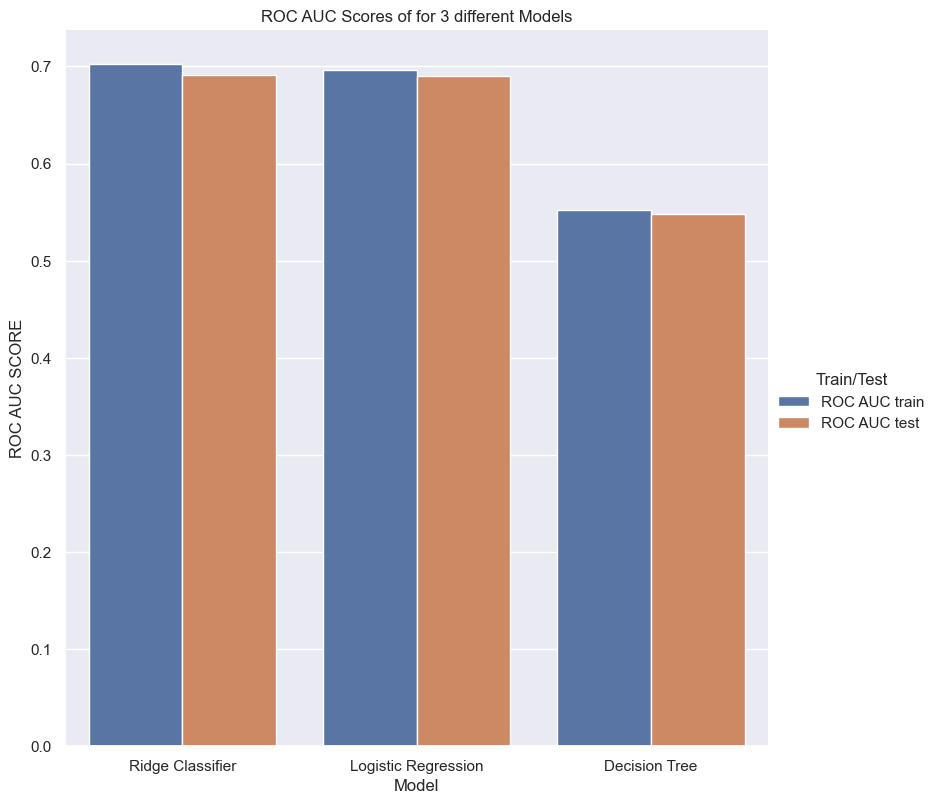

,Model,ROC AUC train,ROC AUC test
2,Ridge Classifier,0.702458,0.690945
1,Logistic Regression,0.696528,0.689946
0,Decision Tree,0.551918,0.547887


In [233]:
#Converting our scores array into a Dataframe    
scores_dt = pd.DataFrame(scores)

#Selecting average ROC AUC Score and accuracy by model
scores_dt = scores_dt.groupby("Model").mean().reset_index().sort_values(by="ROC AUC test", ascending=False)

scores_melt = pd.melt(scores_dt, id_vars='Model')
scores_melt.rename(columns={"variable": "Train/Test"}, inplace=True)
sns.set(rc={'figure.figsize':(20,15)})
sns.catplot(x='Model', y='value', hue='Train/Test', data=scores_melt, kind='bar', height = 8)
plt.title("ROC AUC Scores of for 3 different Models")
plt.xlabel("Model")
plt.ylabel("ROC AUC SCORE")
plt.show()

scores_dt.head()

Conclusion: Our **Ridge Classifier model is better both in term of ROC AUC train and test.**

This **is the model we will choose** for the subsequent parts of this project.

### 7.3 Scaler Selection

Now that we've selected a model, we want to find the best scaler for this model.

In [100]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

scores = []

#Defining a scaler selector class that will allow us to change scalers within the pipeline
from sklearn.base import BaseEstimator, TransformerMixin


class ScalerSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, scaler=StandardScaler()):
        super().__init__()
        self.scaler = scaler

    def fit(self, X, y=None):
        return self.scaler.fit(X)

    def transform(self, X, y=None):
        return self.scaler.transform(X)


#Creating our pipeline
scaler_test_pipe = Pipeline([
    ('cat_encode', cat_encode),
    ('imputation', SimpleImputer(strategy='median')),
    ('scaler', ScalerSelector()),
    ('variance_select', VarianceThreshold(threshold=0.02)),
    ('over_sampling', ADASYN()),
    ('ridge', RidgeClassifier(alpha=6.967))
    ], memory="./Cache/")


params = {
    'scaler__scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), Normalizer()] 
}

#We use GridSearch here since we have a low number of parameters to test
gs = GridSearchCV(scaler_test_pipe,
                 params,
                 cv=3,
                 n_jobs=1,
                 pre_dispatch=1,
                 error_score='raise',
                 verbose=10)

gs.fit(X_train_reduced, y_train)

print("tuned hpyerparameters :(best parameters) ",gs.best_params_)
print("ROC AUC :",gs.best_score_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START scaler__scaler=StandardScaler().............................
[CV 1/3; 1/4] END scaler__scaler=StandardScaler();, score=0.707 total time= 1.1min
[CV 2/3; 1/4] START scaler__scaler=StandardScaler().............................
[CV 2/3; 1/4] END scaler__scaler=StandardScaler();, score=0.710 total time= 1.1min
[CV 3/3; 1/4] START scaler__scaler=StandardScaler().............................
[CV 3/3; 1/4] END scaler__scaler=StandardScaler();, score=0.710 total time= 1.1min
[CV 1/3; 2/4] START scaler__scaler=RobustScaler()...............................
[CV 1/3; 2/4] END scaler__scaler=RobustScaler();, score=0.696 total time=  37.2s
[CV 2/3; 2/4] START scaler__scaler=RobustScaler()...............................
[CV 2/3; 2/4] END scaler__scaler=RobustScaler();, score=0.698 total time=  39.6s
[CV 3/3; 2/4] START scaler__scaler=RobustScaler()...............................
[CV 3/3; 2/4] END scaler__scaler=RobustScal

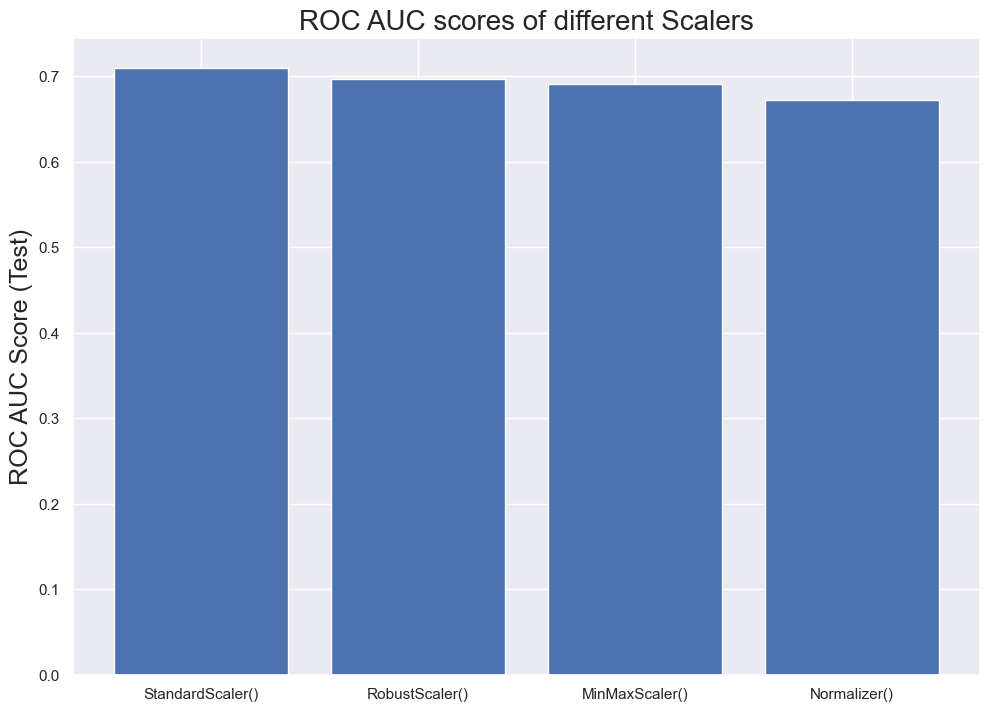

In [177]:
scores_cv = pd.DataFrame(gs.cv_results_).copy()

scores_cv = scores_cv[["param_scaler__scaler","mean_test_score"]]

scores_cv.rename(columns={"param_scaler__scaler": "Scaler", "mean_test_score": "ROC AUC test"}, inplace=True)

plt.bar(scores_cv["Scaler"].apply(str),scores_cv["ROC AUC test"])
plt.title("ROC AUC scores of different Scalers")
plt.ylabel("ROC AUC Score (Test)")
plt.show()

Our **Standard Scaler is slightly superior** to the others and we will choose it for the remainder of this project.

### 7.4 Categorical variable encoding

We had some categorical variables, and we hypothesize that the encoding algorithm(s) used can change our results. We will thus try different algorithms using GridSearch once again.

In [183]:
from category_encoders.one_hot import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

#Creating a CategoricalEncodingSelector 
class CategoricalEncodingSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, sel=OneHotEncoder()):
        super().__init__()
        self.sel = sel

    def fit(self, X, y=None):
        if y.isna().all():
            return self.sel.fit(X)
        else:
            return self.sel.fit(X,y)

    def transform(self, X, y=None):
        return self.sel.transform(X)

#Creating our pipeline
sel_test_pipe = Pipeline([
    ('cat_encode', CategoricalEncodingSelector()),
    ('imputation', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('variance_select', VarianceThreshold(threshold=0.02)),
    ('over_sampling', ADASYN()),
    ('ridge', RidgeClassifier(alpha=6.967))
    ], memory="./Cache/")


params = {
    'cat_encode__sel': [cat_encode, OrdinalEncoder(), WOEEncoder(), OneHotEncoder()] 
}

#Applying gridsearch
gs_sel = GridSearchCV(sel_test_pipe,
                 params,
                 cv=3,
                 n_jobs=1,
                 pre_dispatch=1,
                 error_score='raise',
                 verbose=10)

gs_sel.fit(X_train_reduced, y_train)

print("tuned hpyerparameters :(best parameters) ",gs_sel.best_params_)
print("ROC AUC :",gs_sel.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START cat_encode__sel=ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(handle_unknown='ignore'),
                                 ['CODE_GENDER', 'NAME_EDUCATION_TYPE',
                                  'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
                                  'EMERGENCYSTATE_MODE']),
                                ('label', OrdinalEncoder(),
                                 ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
                                  'FLAG_OWN_REALTY']),
                                ('woe', WOEEncoder(),
                                 ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                                  'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                                  'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
                                  'WALLSMATERIAL_MODE'])])
[CV 1/3; 1/4] END cat_encode__sel=ColumnTransformer(

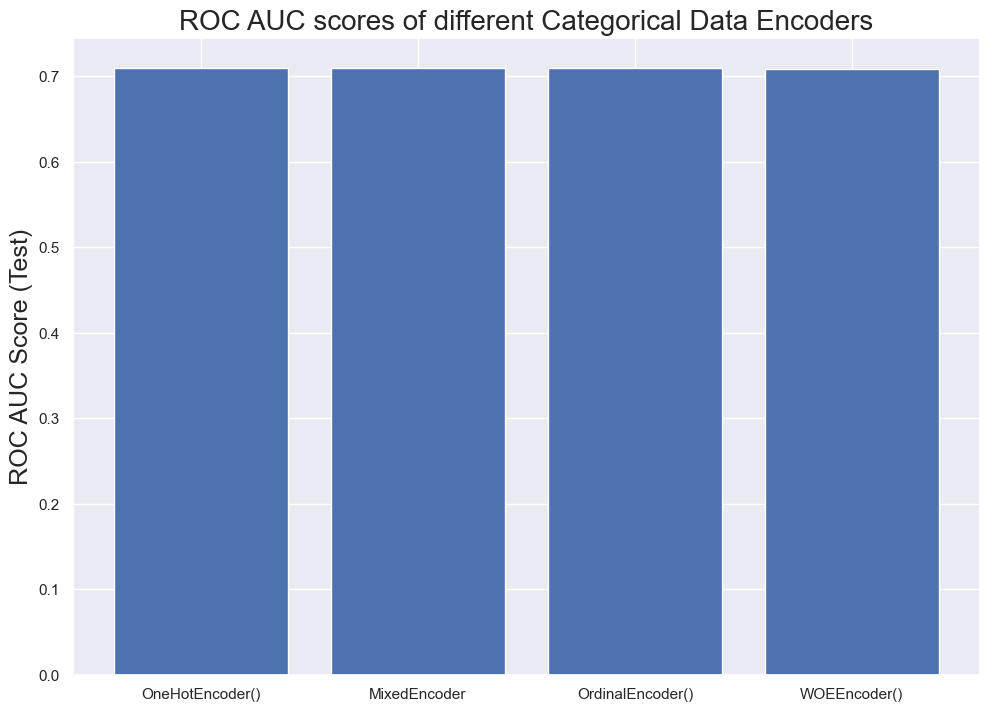

In [193]:
scores_cv = pd.DataFrame(gs_sel.cv_results_).copy().sort_values(by='rank_test_score')

scores_cv = scores_cv[["param_cat_encode__sel","mean_test_score"]]

scores_cv.rename(columns={"param_cat_encode__sel": "Encoder", "mean_test_score": "ROC AUC test"}, inplace=True)
scores_cv.iloc[1,0] = "MixedEncoder"

plt.bar(scores_cv["Encoder"].apply(str),scores_cv["ROC AUC test"])
plt.title("ROC AUC scores of different Categorical Data Encoders")
plt.ylabel("ROC AUC Score (Test)")
plt.show()

In [190]:
pd.DataFrame(gs_sel.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_cat_encode__sel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,18.668592,0.067268,1.639520,0.029770,"ColumnTransformer(remainder='passthrough',\n ...",{'cat_encode__sel': ColumnTransformer(remainde...,0.707157,0.710336,0.709995,0.709163,0.001425,2
1,18.152243,0.377272,1.355257,0.050670,OrdinalEncoder(),{'cat_encode__sel': OrdinalEncoder()},0.705438,0.710531,0.711190,0.709053,0.002571,3
2,17.493574,0.094775,1.518409,0.055116,WOEEncoder(),{'cat_encode__sel': WOEEncoder()},0.706791,0.710092,0.709397,0.708760,0.001421,4
3,84.408982,1.602162,3.015548,0.088239,OneHotEncoder(),{'cat_encode__sel': OneHotEncoder()},0.707352,0.709056,0.711190,0.709199,0.001570,1


**One Hot Encoder** is the **most performant** for our Ridge Regression Algorithm, but it is only **slightly better than our Mixed Encoder** (One Hot when number of cat <= 5 and WOE otherwise). 

The problem is that this **slight boost in performance doubles our calculation time**. That's why we choose to **keep our Mixed Encoder** for the rest of the project, as it has the best compromise between performance and speed.

Now let's try to tune our Feature Selection process.

### 7.5 Feature Selection

Just as with Scaler and Categorical variable selection, we will apply different feature selection algorithms to try and increase the performance of our model. For some of those algorithms, we will also tune their hyperparameters.

In [99]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.base import BaseEstimator, TransformerMixin
from category_encoders.one_hot import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest

#Defining a custom feature selector
class FeatureSelectionSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, sel=VarianceThreshold()):
        super().__init__()
        self.sel = sel

    def fit(self, X, y=None):
        if y.isna().all():
            return self.sel.fit(X)
        else:
            return self.sel.fit(X,y)

    def transform(self, X, y=None):
        return self.sel.transform(X)
    


    
#Creating our pipeline
sel_test_pipe = Pipeline([
    ('cat_encode', OneHotEncoder()),
    ('imputation', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('var', FeatureSelectionSelector()),
    ('over_sampling', ADASYN()),
    ('ridge', RidgeClassifier(alpha=6.967))
    ], memory="./Cache/")

#Define a list of hyperparameters we want to tune
var_search = {
    'var': [VarianceThreshold()],
    'var__threshold': Real(0,.04) #Highest variance tested is .04 otherwise the selector may return an empty dataframe
}

kbest_search = {
    'var': [SelectKBest()],
    'var__k': Integer(20,100) #Small Kbest values are not tested because they raise a random KNN error
}

boruta_search = {
    'var': [BorutaPy(RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5, n_jobs=1),
                     n_estimators='auto', verbose=2, random_state=1, max_iter=50)]
}

#Defining the search
search_sel = BayesSearchCV(
    sel_test_pipe,
    search_spaces=[(kbest_search, 10), (var_search, 10), (boruta_search, 1)],
    n_jobs=1,
    pre_dispatch= 1,
    scoring='roc_auc',
    error_score=0.5,
    cv=3,
    verbose=10)

#Fitting our searcher
search_sel.fit(X_train_reduced,y_train)

print("tuned hpyerparameters :(best parameters) ",search_sel.best_params_)
print("ROC AUC :",search_sel.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START var=SelectKBest(), var__k=33................................
[CV 1/3; 1/1] END .var=SelectKBest(), var__k=33;, score=0.740 total time=  36.8s
[CV 2/3; 1/1] START var=SelectKBest(), var__k=33................................
[CV 2/3; 1/1] END .var=SelectKBest(), var__k=33;, score=0.743 total time=  21.6s
[CV 3/3; 1/1] START var=SelectKBest(), var__k=33................................
[CV 3/3; 1/1] END .var=SelectKBest(), var__k=33;, score=0.746 total time=  21.9s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START var=SelectKBest(), var__k=70................................
[CV 1/3; 1/1] END .var=SelectKBest(), var__k=70;, score=0.741 total time=  23.1s
[CV 2/3; 1/1] START var=SelectKBest(), var__k=70................................
[CV 2/3; 1/1] END .var=SelectKBest(), var__k=70;, score=0.742 total time=  22.7s
[CV 3/3; 1/1] START var=SelectKBest(), var__k=70........................

[CV 2/3; 1/1] END var=VarianceThreshold(), var__threshold=0.021677411647138597;, score=0.750 total time=  37.4s
[CV 3/3; 1/1] START var=VarianceThreshold(), var__threshold=0.021677411647138597
[CV 3/3; 1/1] END var=VarianceThreshold(), var__threshold=0.021677411647138597;, score=0.752 total time=  25.8s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START var=VarianceThreshold(), var__threshold=0.015170153274862859
[CV 1/3; 1/1] END var=VarianceThreshold(), var__threshold=0.015170153274862859;, score=0.751 total time=  27.0s
[CV 2/3; 1/1] START var=VarianceThreshold(), var__threshold=0.015170153274862859
[CV 2/3; 1/1] END var=VarianceThreshold(), var__threshold=0.015170153274862859;, score=0.750 total time=  25.8s
[CV 3/3; 1/1] START var=VarianceThreshold(), var__threshold=0.015170153274862859
[CV 3/3; 1/1] END var=VarianceThreshold(), var__threshold=0.015170153274862859;, score=0.752 total time=  33.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fit

Iteration: 	11 / 50
Confirmed: 	199
Tentative: 	57
Rejected: 	349
Iteration: 	12 / 50
Confirmed: 	201
Tentative: 	55
Rejected: 	349
Iteration: 	13 / 50
Confirmed: 	201
Tentative: 	46
Rejected: 	358
Iteration: 	14 / 50
Confirmed: 	201
Tentative: 	46
Rejected: 	358
Iteration: 	15 / 50
Confirmed: 	201
Tentative: 	46
Rejected: 	358
Iteration: 	16 / 50
Confirmed: 	204
Tentative: 	43
Rejected: 	358
Iteration: 	17 / 50
Confirmed: 	204
Tentative: 	43
Rejected: 	358
Iteration: 	18 / 50
Confirmed: 	204
Tentative: 	43
Rejected: 	358
Iteration: 	19 / 50
Confirmed: 	205
Tentative: 	42
Rejected: 	358
Iteration: 	20 / 50
Confirmed: 	205
Tentative: 	41
Rejected: 	359
Iteration: 	21 / 50
Confirmed: 	205
Tentative: 	37
Rejected: 	363
Iteration: 	22 / 50
Confirmed: 	205
Tentative: 	37
Rejected: 	363
Iteration: 	23 / 50
Confirmed: 	205
Tentative: 	37
Rejected: 	363
Iteration: 	24 / 50
Confirmed: 	205
Tentative: 	37
Rejected: 	363
Iteration: 	25 / 50
Confirmed: 	205
Tentative: 	37
Rejected: 	363
Iteration:

Iteration: 	24 / 50
Confirmed: 	233
Tentative: 	32
Rejected: 	340
Iteration: 	25 / 50
Confirmed: 	233
Tentative: 	28
Rejected: 	344
Iteration: 	26 / 50
Confirmed: 	233
Tentative: 	28
Rejected: 	344
Iteration: 	27 / 50
Confirmed: 	233
Tentative: 	28
Rejected: 	344
Iteration: 	28 / 50
Confirmed: 	233
Tentative: 	28
Rejected: 	344
Iteration: 	29 / 50
Confirmed: 	234
Tentative: 	25
Rejected: 	346
Iteration: 	30 / 50
Confirmed: 	234
Tentative: 	25
Rejected: 	346
Iteration: 	31 / 50
Confirmed: 	234
Tentative: 	25
Rejected: 	346
Iteration: 	32 / 50
Confirmed: 	234
Tentative: 	25
Rejected: 	346
Iteration: 	33 / 50
Confirmed: 	234
Tentative: 	25
Rejected: 	346
Iteration: 	34 / 50
Confirmed: 	234
Tentative: 	25
Rejected: 	346
Iteration: 	35 / 50
Confirmed: 	234
Tentative: 	25
Rejected: 	346
Iteration: 	36 / 50
Confirmed: 	234
Tentative: 	24
Rejected: 	347
Iteration: 	37 / 50
Confirmed: 	236
Tentative: 	22
Rejected: 	347
Iteration: 	38 / 50
Confirmed: 	236
Tentative: 	22
Rejected: 	347
Iteration:

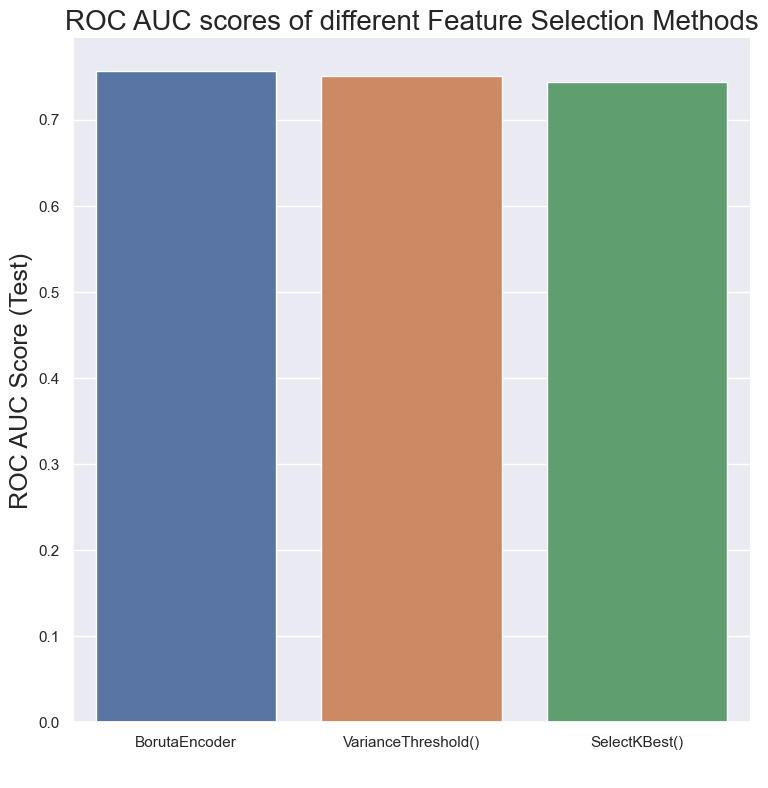

In [130]:
scores_cv = pd.DataFrame(search_sel.cv_results_).copy().sort_values(by='rank_test_score')

scores_cv.rename(columns={"param_var": "Selector", "mean_test_score": "ROC AUC test"}, inplace=True)
scores_cv["Selector"] = scores_cv["Selector"].apply(str)
scores_sum = scores_cv[["Selector", "ROC AUC test"]]
scores_sum = scores_cv.groupby(["Selector"]).max().reset_index().sort_values(by="ROC AUC test", ascending=False)
scores_sum.iloc[0,0] = "BorutaEncoder"

sns.catplot(data=scores_sum, x="Selector",y="ROC AUC test", kind='bar', height=8)
plt.title("ROC AUC scores of different Feature Selection Methods")
plt.ylabel("ROC AUC Score (Test)")
plt.xlabel(" ")
plt.show()

The **Boruta Encoder** is the most performant for our dataset and algorithm. We will thus keep it for the rest of this project. 

We also take the opportunity to plot the ideal number of features for our Kbest algorithm:

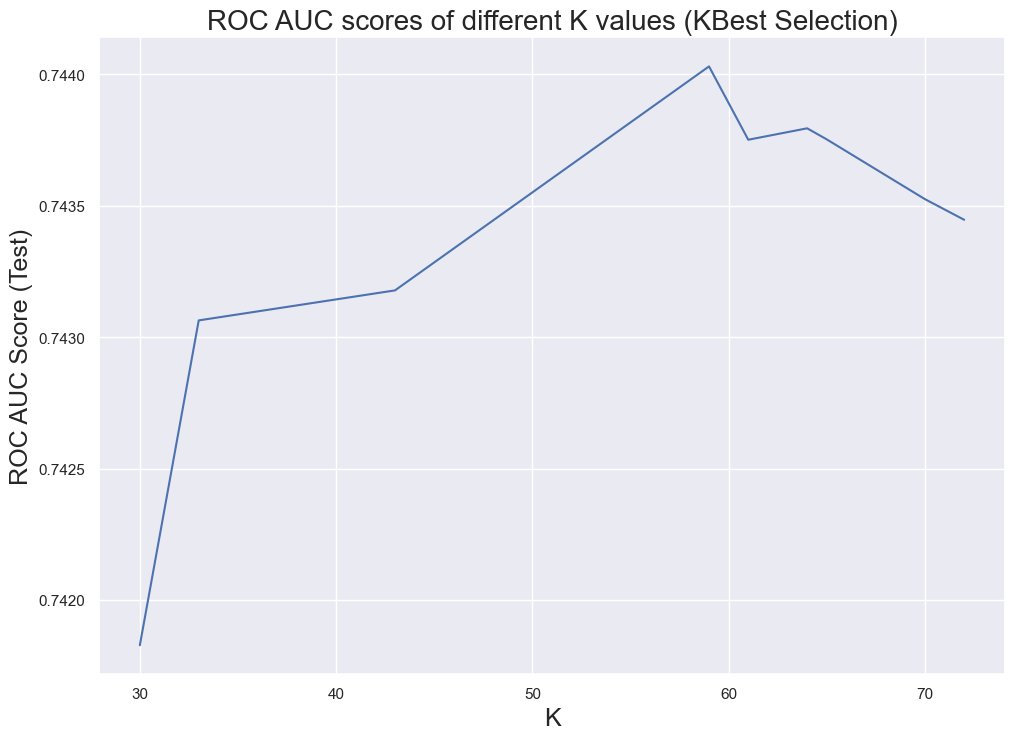

In [135]:
kbest_df = scores_cv[scores_cv.Selector == "SelectKBest()"]

kbest_df = kbest_df[["param_var__k","ROC AUC test"]]
kbest_df.columns = ["k", "ROC AUC test"]

sns.lineplot(data=kbest_df, x='k', y='ROC AUC test')
plt.title("ROC AUC scores of different K values (KBest Selection)")
plt.xlabel("K")
plt.ylabel("ROC AUC Score (Test)")
plt.show()


**58 seems to be the ideal number of features** for our Kbest algorithm. We could choose it to speed up calculations but for this project we will continue using our boruta selector that has much better performance.

In [101]:
#Defining the pipeline before transformation by the Boruta algorithm
pipe = sel_test_pipe = Pipeline([
    ('cat_encode', cat_encode),
    ('imputation', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

X_train_transformed = pipe.fit_transform(X_train_reduced, y_train)


In [102]:
#Saving our Boruta Encoder selected columns for faster preprocessing
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5, n_jobs=-1)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1, max_iter=100)
boruta_selector.fit(X_train_transformed, y_train) 

joblib.dump(boruta_selector, 'Data/boruta_selector.pkl')

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	496
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	496
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	496
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	496
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	496
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	496
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	496
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	224
Tentative: 	53
Rejected: 	219
Iteration: 	9 / 100
Confirmed: 	224
Tentative: 	53
Rejected: 	219
Iteration: 	10 / 100
Confirmed: 	224
Tentative: 	53
Rejected: 	219
Iteration: 	11 / 100
Confirmed: 	224
Tentative: 	53
Rejected: 	219
Iteration: 	12 / 100
Confirmed: 	224
Tentative: 	53
Rejected: 	219
Iteration: 	13 / 100
Confirmed: 	224
Tentative: 	39
Rejected: 	233
Iteration: 	14 / 100
Confirmed: 	224
Tentative: 	39
Rejected: 	233
Iteration: 	15 / 100
Confirmed: 	224
Tentative: 	39
Rejected: 	233
Iteration: 	16 / 100
Conf

['Data/boruta_selector.pkl']

In [30]:
import dill

with open('Data/boruta_selector.pkl', 'rb') as file:
    boruta_selector = dill.load(file)
    
#Creating a custom transformer to apply our Boruta Selector

from sklearn.preprocessing import FunctionTransformer
def boruta_transform(X,y=None):
    return boruta_selector.transform(X)

#Defining our function transformer
boruta = FunctionTransformer(boruta_transform)

In [31]:
from sklearn.utils.extmath import softmax
from sklearn.linear_model import RidgeClassifier
#Extending the Ridge Classifier Class to have Probabilities
class RidgeClassifierWithProba(RidgeClassifier):

    def predict_proba(self, X):
        d = self.decision_function(X)
        d_2d = np.c_[-d, d]
        return softmax(d_2d)


#Defining our final pipeline
final_pipe = Pipeline([
    ('cat_encode', cat_encode),
    ('imputation', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('var', boruta),
    ('os', ADASYN()),
    ('ridge',RidgeClassifierWithProba(alpha=6.967)),
    ], memory="./Cache/")

final_pipe

Pipeline(memory='./Cache/',
         steps=[('cat_encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['CODE_GENDER',
                                                   'NAME_EDUCATION_TYPE',
                                                   'FONDKAPREMONT_MODE',
                                                   'HOUSETYPE_MODE',
                                                   'EMERGENCYSTATE_MODE']),
                                                 ('label', OrdinalEncoder(),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY']),
                                                 ('woe', WOEEncoder(),
                                                  ['NAME_TYPE_SUITE',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_HOUSING_TYPE',
                                                   'OCCUPATION_TYPE',
                                                   'ORGANIZATION_TYPE',
                                                   'WALLSMATERIAL_MODE'])])),
                ('imputation', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('var',
                 FunctionTransformer(func=<function boruta_transform at 0x000002DF8E126040>)),
                ('os', ADASYN()),
                ('ridge', RidgeClassifierWithProba(alpha=6.967))])

We have now defined our final pipeline and we are ready to apply it to the test set to check our results.

## 8. Final Model

### 8.1 Results on the Test Set

In [32]:
final_pipe.fit(X_train_reduced, y_train)
train_predictions = final_pipe.predict(X_train_reduced)
proba_train = final_pipe.predict_proba(X_train_reduced)[:, 1]
test_predictions = final_pipe.predict(X_test)
proba_test = final_pipe.predict_proba(X_test)[:, 1]

print("Logistic Regression results")
print("TRAIN:")
print(classification_report(y_train, train_predictions))
print(confusion_matrix(y_train, train_predictions))
print("ROC AUC train : {:.5f}".format(roc_auc_score(y_train, proba_train)))
print("----------------------")
print("TEST:")
print(classification_report(y_test, test_predictions))
print(confusion_matrix(y_test, test_predictions))
print("ROC AUC test : {:.5f}".format(roc_auc_score(y_test, proba_test)))

joblib.dump(final_pipe, "Data/final_pipe.pkl")

Logistic Regression results
TRAIN:
              precision    recall  f1-score   support

           0       0.96      0.69      0.81    226126
           1       0.17      0.70      0.27     19881

    accuracy                           0.69    246007
   macro avg       0.57      0.70      0.54    246007
weighted avg       0.90      0.69      0.76    246007

[[156944  69182]
 [  5905  13976]]
ROC AUC train : 0.76415
----------------------
TEST:
              precision    recall  f1-score   support

           0       0.96      0.69      0.81     28269
           1       0.17      0.70      0.27      2482

    accuracy                           0.69     30751
   macro avg       0.57      0.70      0.54     30751
weighted avg       0.90      0.69      0.76     30751

[[19623  8646]
 [  740  1742]]
ROC AUC test : 0.75917


['Data/final_pipe.pkl']

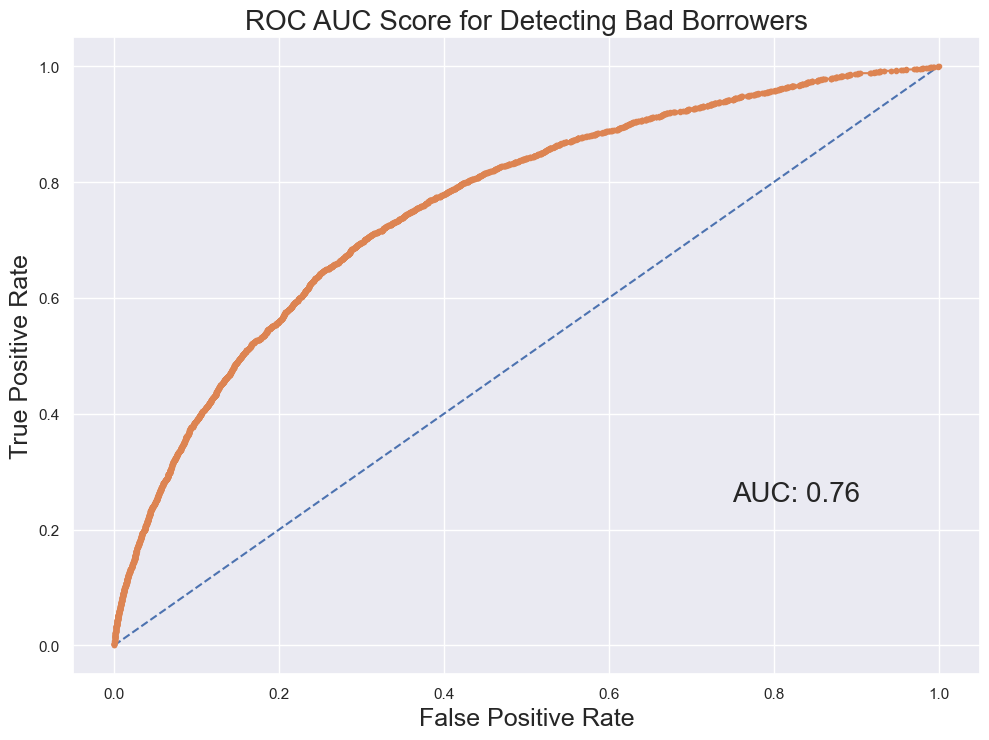

In [33]:
from sklearn.metrics import roc_curve

# Define a function to plot the ROC/AUC
def plotRocAuc(model, X, y):
    
    probabilities = model.predict_proba(X)
    probabilities = probabilities[:, 1]  # keep probabilities for first class only
        
    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y, probabilities)    
    
    # Plot the "dumb model" line
    plt.plot([0, 1], [0, 1], linestyle='--')
    
    # Plot the model line
    plt.plot(fpr, tpr, marker='.')
    plt.text(0.75, 0.25, "AUC: " + str(round(roc_auc_score(y, probabilities),2)))
    plt.title("ROC AUC Score for Detecting Bad Borrowers")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    # show the plot
    plt.show()
    
plotRocAuc(final_pipe, X_test, y_test)

The results are good but not outstanding for our model. This is the **limitation of only studying interpretable models**, as deep learning or ensemble learning models, especially those that can handle sparse data, would probably have reached better results. 

Our **final ROC AUC score** is 0.76 which is a big improvement over our initial ROC AUC. 

Looking at our classification table, it is clear that a **significant amount of "Good Borrowers" have been misclassifier**, which is shown by the low precision for our class 1 (bad borrower) and the moderately low recall of class 0 (good borrower). 

However, our algorithm has **managed to filter out 70% of bad borrowers** at the cost of **filtering out 30% of good borrowers**, which should answer the business need. 

Our customer can then change the probability threshold if they want to filter out more bad borrowers or have a better recall on good borrowers. 


### 8.2 Most relevant features

Now that we have defined and tested our final model, we will **identify the features with the highest coefficients** in our Regression algorithm.

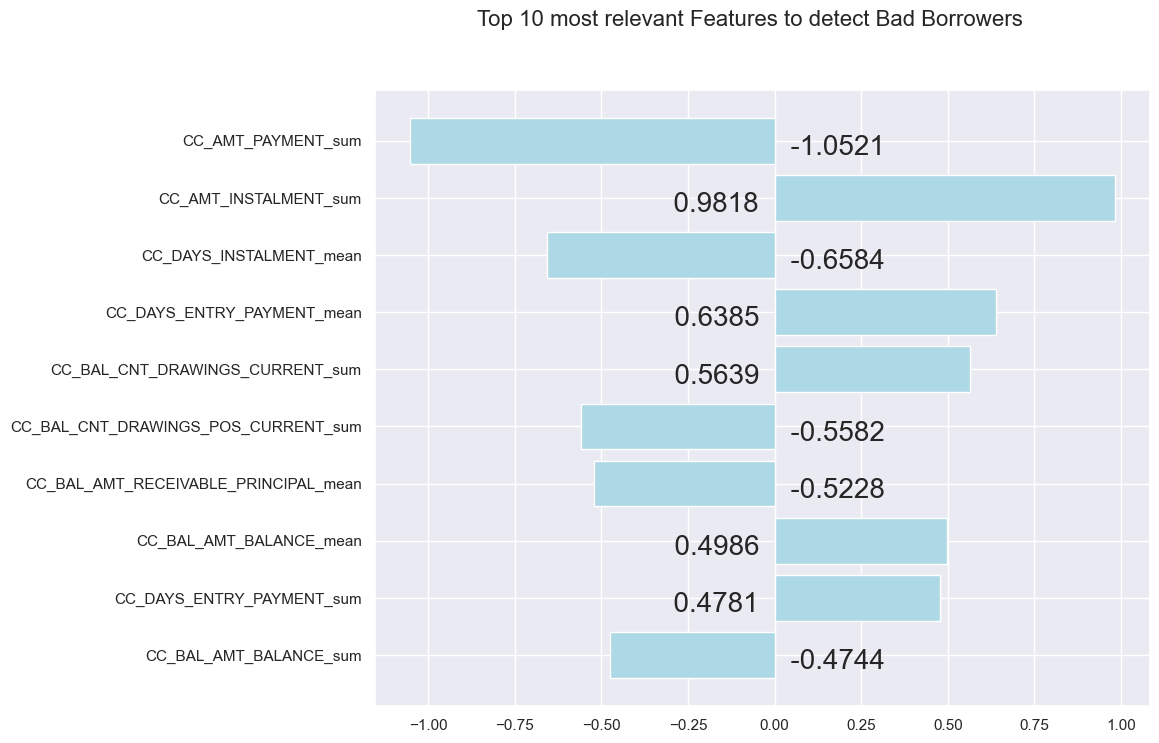

In [204]:
from functions import *

#Name of columns after cat_encoder
new_cols = final_pipe.named_steps["cat_encode"].get_feature_names()

#Grid of the selected columns after boruta transform
boruta_grid = boruta_selector.support_

#Final column names
final_cols = [x for x, y in zip(new_cols, boruta_grid) if y]

len(final_cols)

ridge = final_pipe.named_steps["ridge"]

# Get a list of class names
numclasses = len(ridge.classes_)

classes =  [ridge.classes_[1]] # if we have 2 classes, sklearn only shows one set of coefficients

coefs = ridge.coef_[0]

coefs_df = pd.DataFrame({'Coefficient': coefs, 'Name': final_cols}).sort_values(by="Coefficient", key=abs, ascending=False)

top_10_coefs = coefs_df.head(10).sort_values(by="Coefficient", key=abs, ascending=True)



# Plot the coefficients as bars
fig = plt.figure(figsize=(10,8))
fig.suptitle('Top 10 most relevant Features to detect Bad Borrowers', fontsize=16)
rects = plt.barh(top_10_coefs["Name"], top_10_coefs["Coefficient"],color="lightblue")

# Annotate the bars with the coefficient values
for rect in rects:
    width = round(rect.get_width(),4)
    plt.gca().annotate('  {}  '.format(width),
                xy=(0, rect.get_y()),
                xytext=(0,2),  
                textcoords="offset points",  
                ha='left' if width<0 else 'right', va='bottom')        
plt.show()



It seems that **features from the Credit Card dataset have the most predictive power** (starting with CC) as they make up all of this top 10.

### 8.3 Predicting new data

We will now define a process to apply our algorithm to new data and to predict whether or not the borrowers are likely to miss payments.

In [214]:
app_test = pd.read_csv("Data/application_test.csv")

app_test.info()

app_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    SK_ID_CURR                    48744 non-null  int64  
 1    NAME_CONTRACT_TYPE            48744 non-null  object 
 2    CODE_GENDER                   48744 non-null  object 
 3    FLAG_OWN_CAR                  48744 non-null  object 
 4    FLAG_OWN_REALTY               48744 non-null  object 
 5    CNT_CHILDREN                  48744 non-null  int64  
 6    AMT_INCOME_TOTAL              48744 non-null  float64
 7    AMT_CREDIT                    48744 non-null  float64
 8    AMT_ANNUITY                   48720 non-null  float64
 9    AMT_GOODS_PRICE               48744 non-null  float64
 10   NAME_TYPE_SUITE               47833 non-null  object 
 11   NAME_INCOME_TYPE              48744 non-null  object 
 12   NAME_EDUCATION_TYPE           48744 non-null

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,...,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.525734,0.509677,0.612704,0.3052,0.1974,0.9970,0.9592,0.1165,0.32,0.2759,...,0.3081,0.1974,0.9970,0.9597,0.1173,0.32,0.2759,0.375,0.0417,0.2078,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0

In [72]:
prev_app_df = pd.read_csv("Data/prev_app_df.csv")
bureau_df = pd.read_csv("Data/bureau_df.csv")
cash_df = pd.read_csv("Data/cash_df.csv")
cc_df = pd.read_csv("Data/cc_df.csv")
install_df = pd.read_csv("Data/install_df.csv") 


def preprocess(df):

    df = df.copy()
    #Preprocessing
    df = preprocess_cat_vars(df)
    df = preprocess_num_vars(df)

    #Loading information from external csv files
    df = load_prev_app_info(df)
    df = load_bureau_info(df)
    df = load_cash_info(df)
    df = load_cc_info(df)
    df = load_install_info(df)

    #Replacing infinite values with np.nan
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    #Encoding cyclical vars
    encode_cyclical_vars(df)

    df = df[X_train_reduced.columns]
    
    return df

def credit_score(path):
    
    df = pd.read_csv(path)

    df = preprocess(df)
    
    predictions = final_pipe.predict(df)
    probabs = final_pipe.predict_proba(df)
    
    df["TARGET"] = predictions
    df["Proba_Bad"] = probabs[:,1]
    
    path_final = path.replace('.csv', '') + '_predicted.csv'
    df.to_csv(path_final)
    
    return df


In [73]:
test_analyzed = credit_score("Data/application_test.csv")

test_analyzed.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,CC_DEFICIT_PCT_mean,CC_DEFICIT_PCT_std,CC_DEFICIT_PCT_sum,CC_SK_ID_PREV_nunique,WEEKDAY_APPR_PROCESS_START_sin,WEEKDAY_APPR_PROCESS_START_cos,HOUR_APPR_PROCESS_START_sin,HOUR_APPR_PROCESS_START_cos,TARGET,Proba_Bad
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,...,0.000000,0.000000,0.0,2.0,0.781831,0.623490,-1.000000,-1.836970e-16,0,0.385518
100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,...,0.000000,0.000000,0.0,1.0,-0.433884,-0.900969,0.707107,-7.071068e-01,1,0.737464
100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,...,6.451613,24.133134,1000.0,4.0,0.000000,1.000000,-0.500000,-8.660254e-01,0,0.440228
100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,...,8.849558,21.305559,1000.0,3.0,0.974928,-0.222521,0.258819,-9.659258e-01,0,0.184568
100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,...,0.000000,0.000000,0.0,1.0,-0.433884,-0.900969,0.965926,2.588190e-01,1,0.562150


This finished up the project, **our credit scoring function will calculate the TARGET function(based on a 0.5 probability threshold) and the probabilities and will return and save a new dataframe with the results**.